# This plot highlights the expected mutant codons positions out of all codons of PfDHFR.

Red - Expected mutant codon position
Grey - All codon positions

The dots in red color represnt codon positions where you might expect a mutation (SNP) to be presnt which is assoicated with drug resistance.

# For all individual samples - PfDHFR

/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/mansi/miniconda3/envs/nest/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


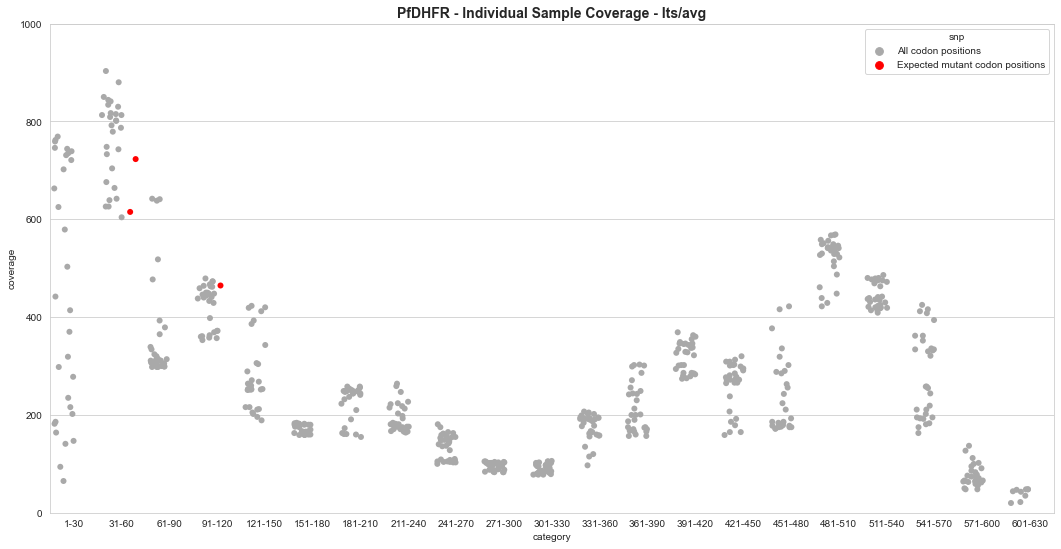

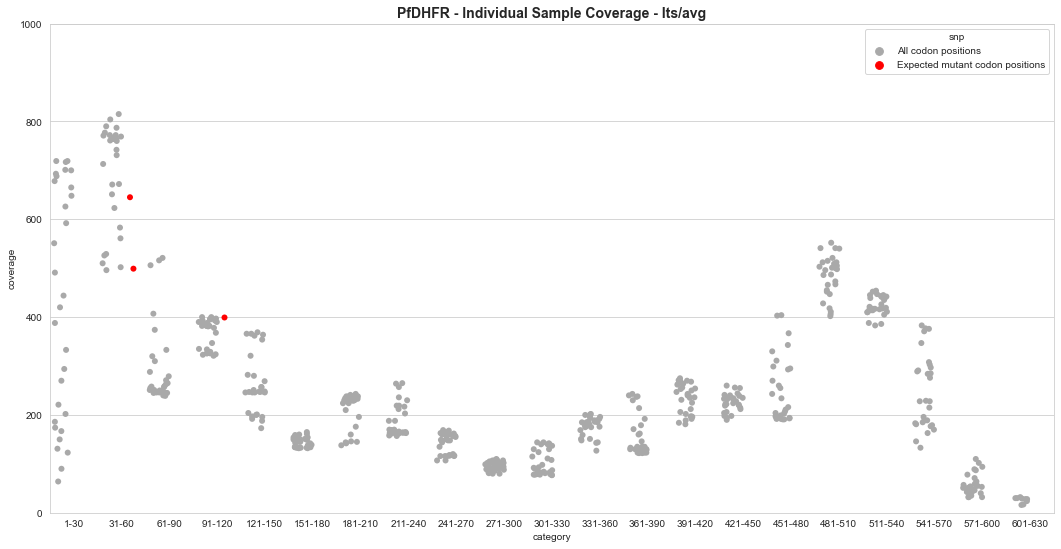

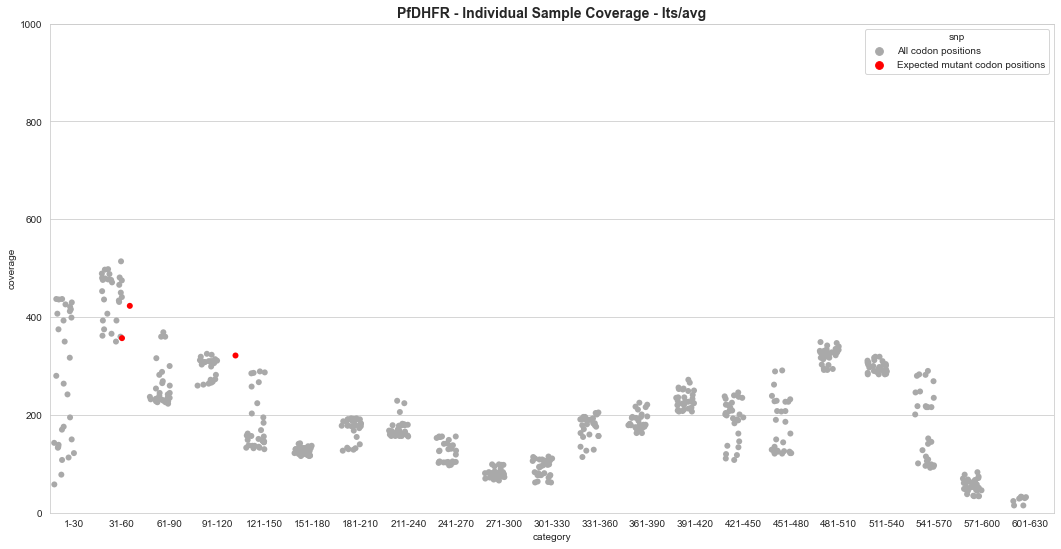

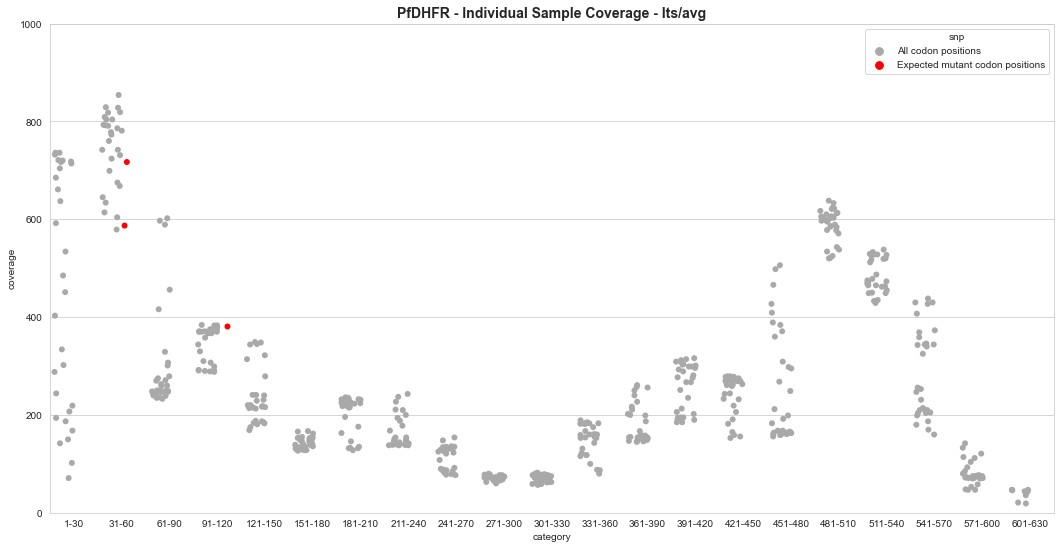

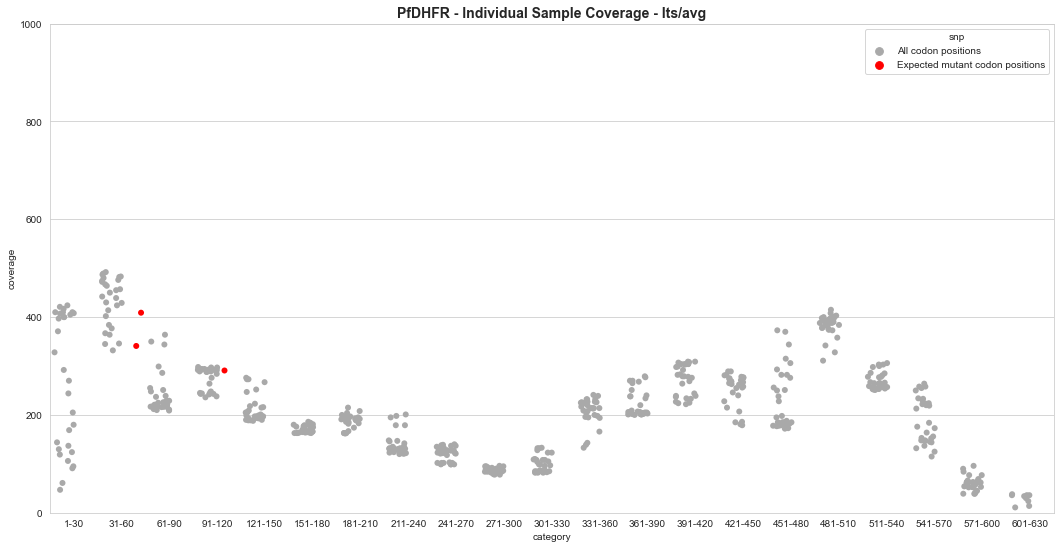

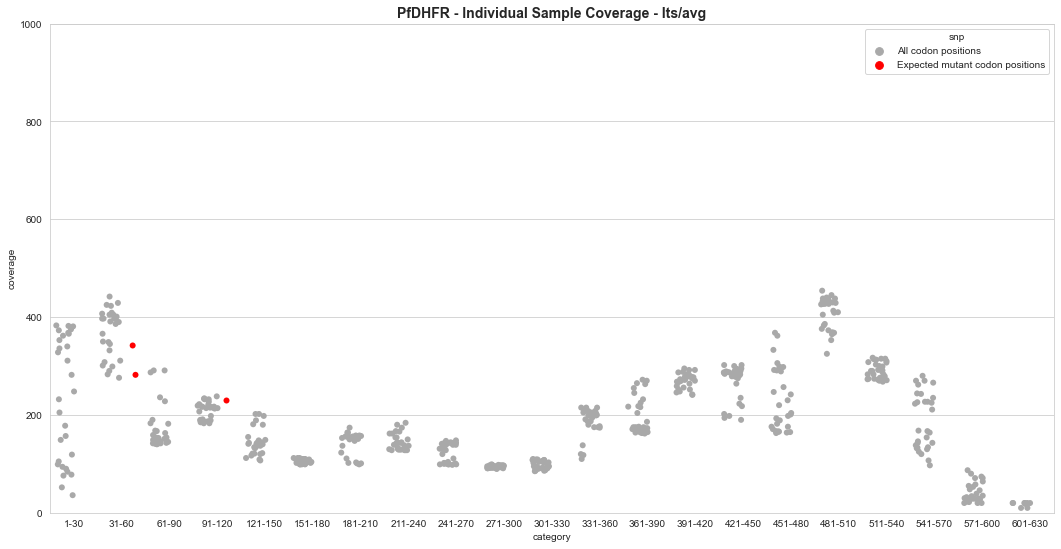

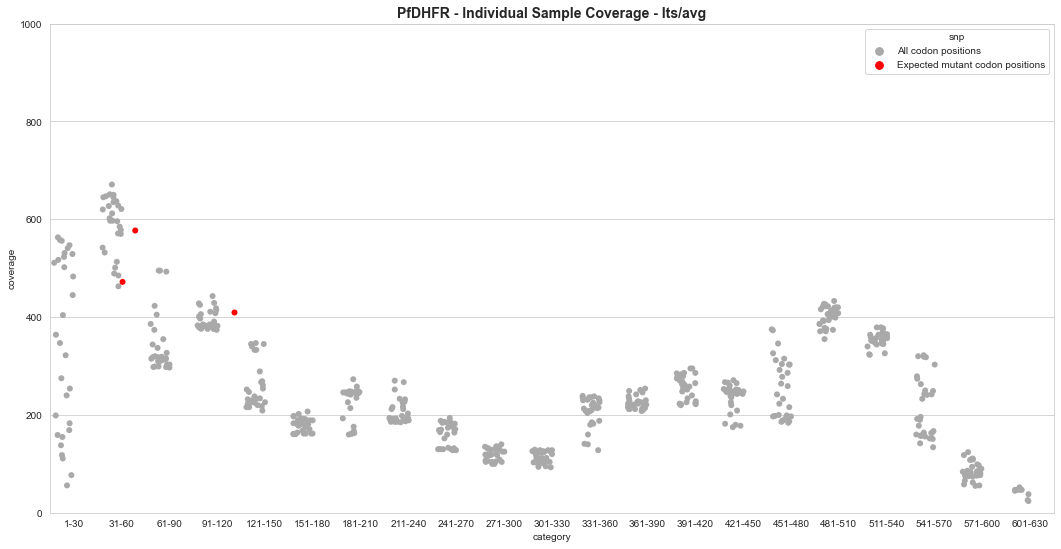

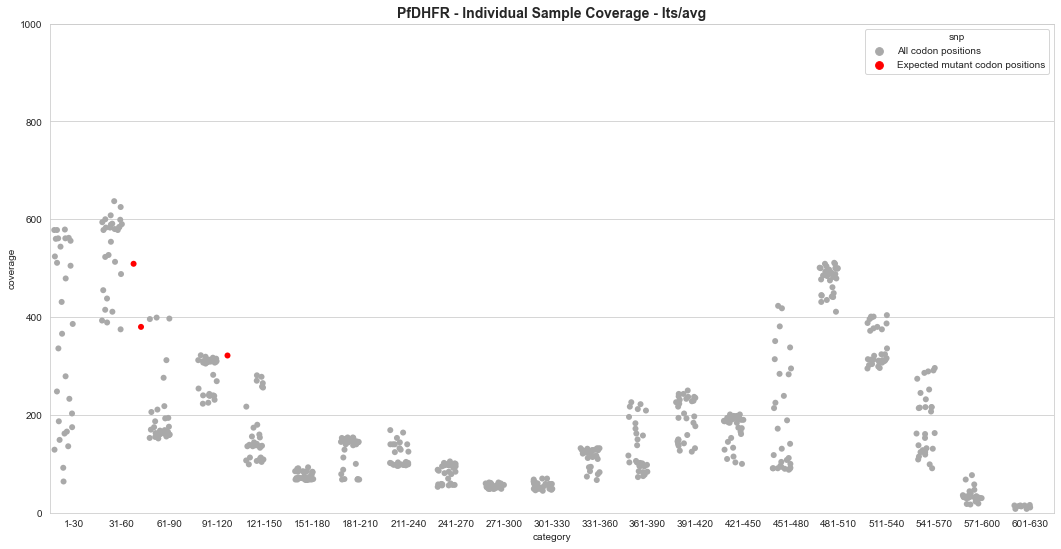

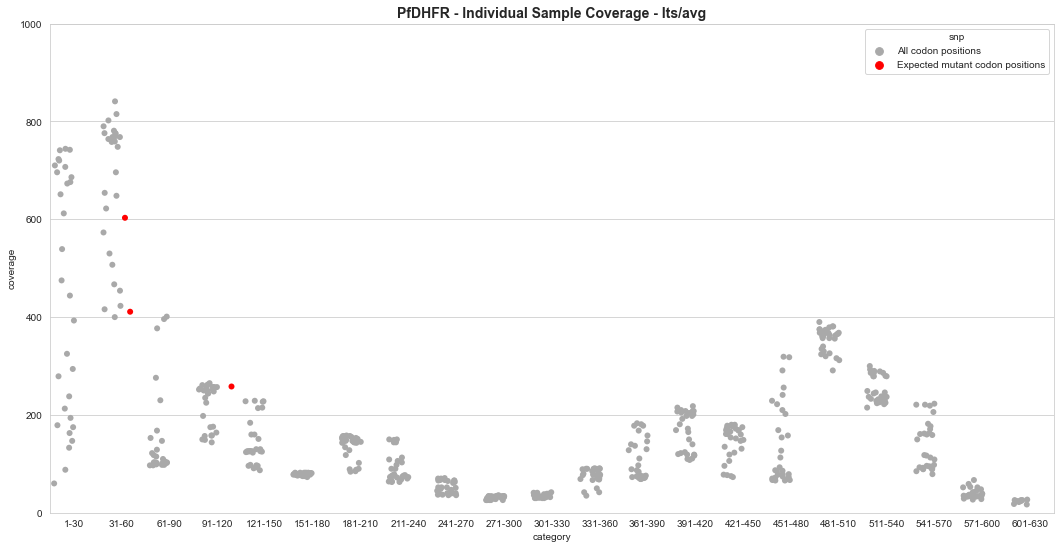

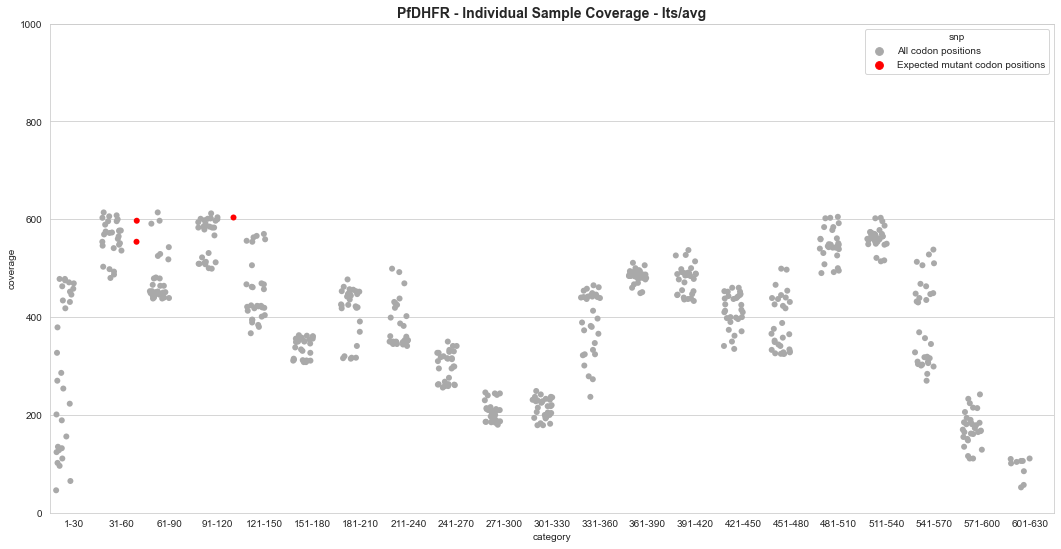

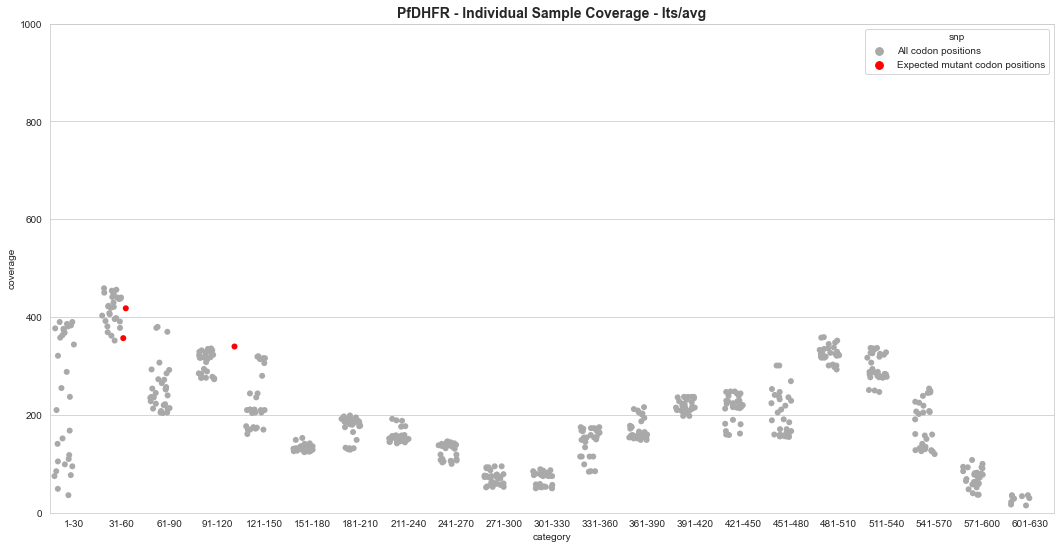

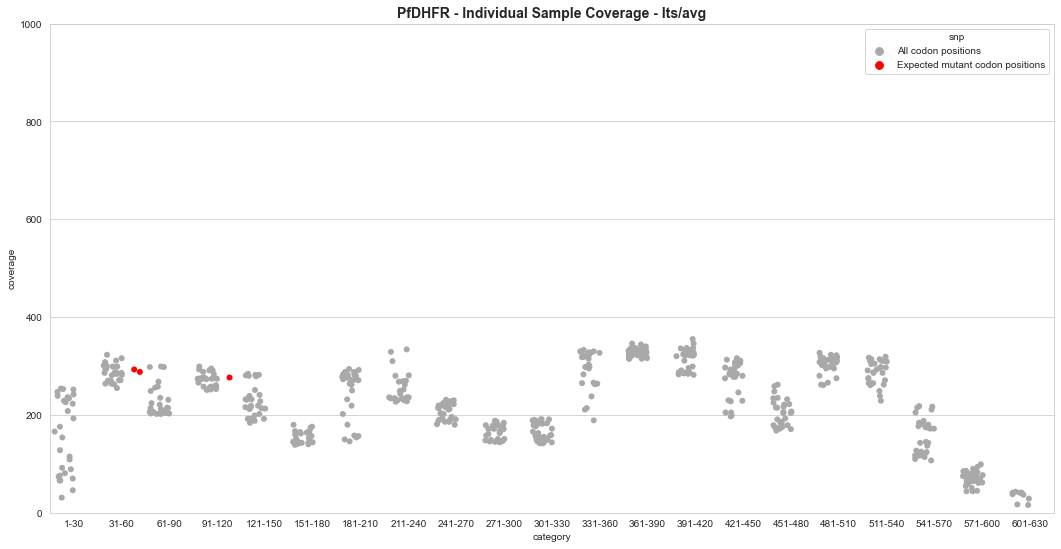

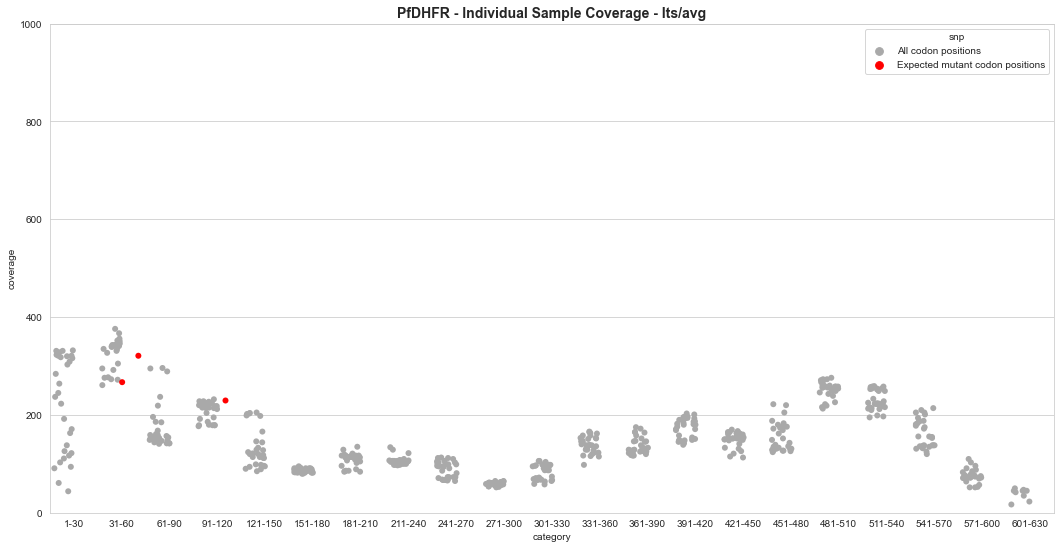

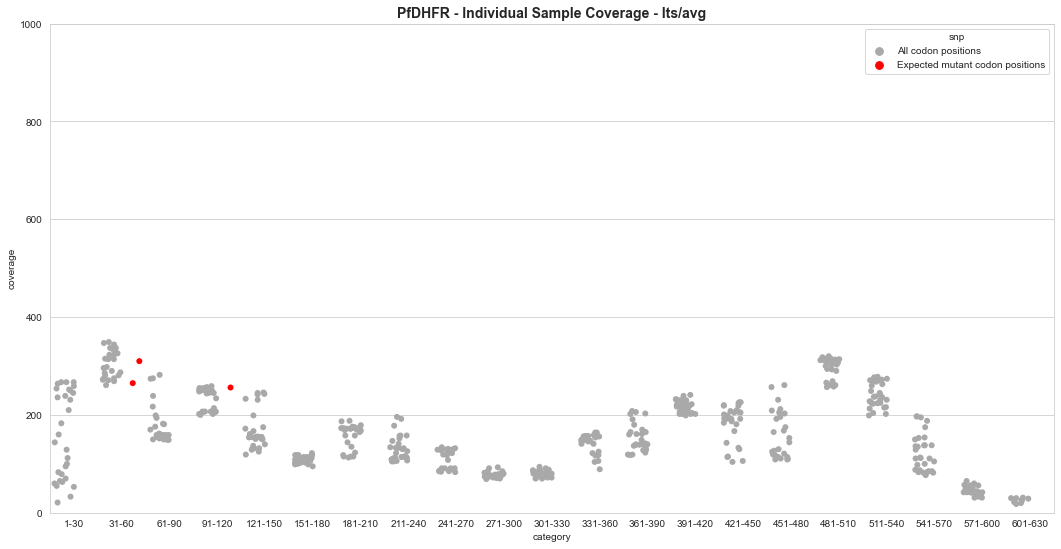

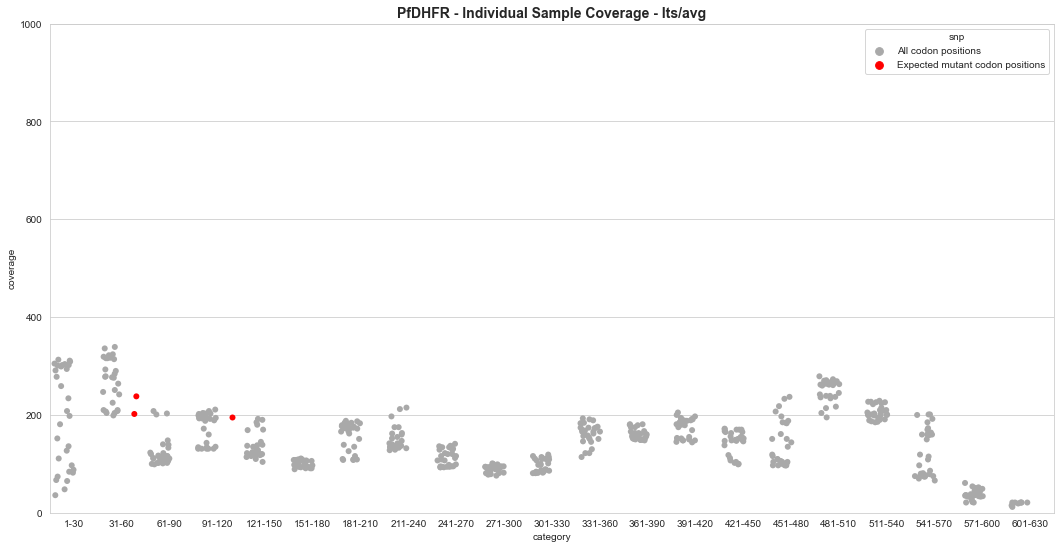

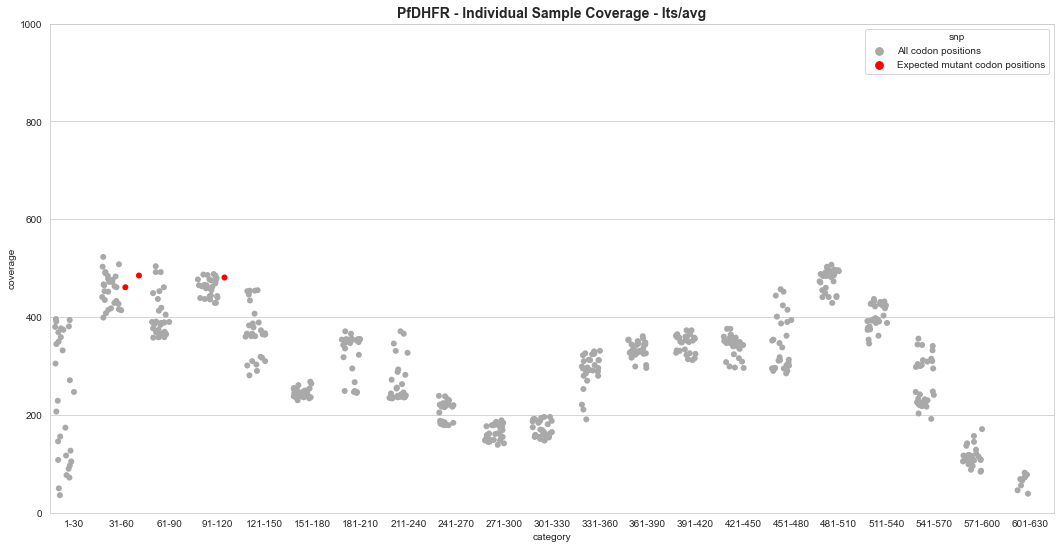

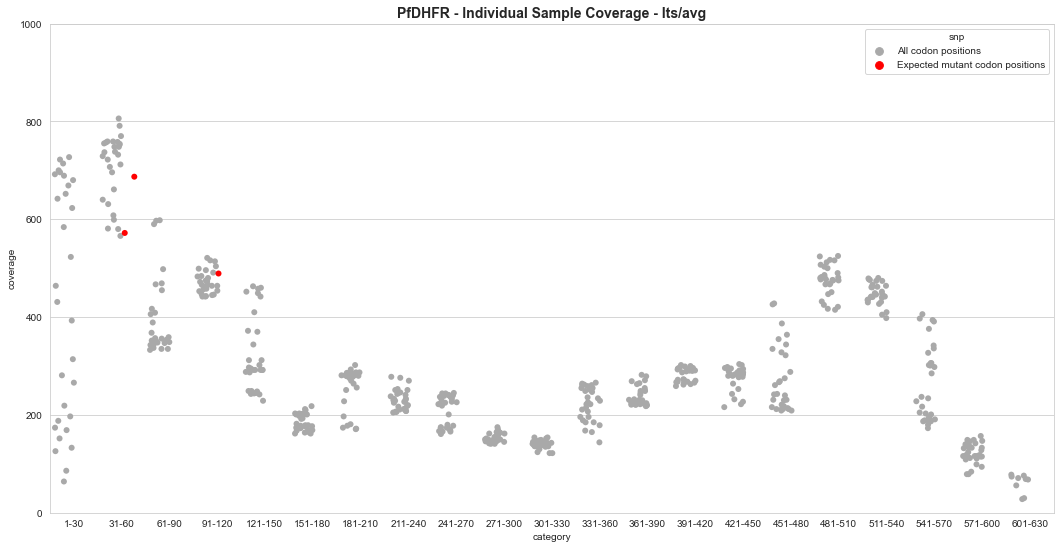

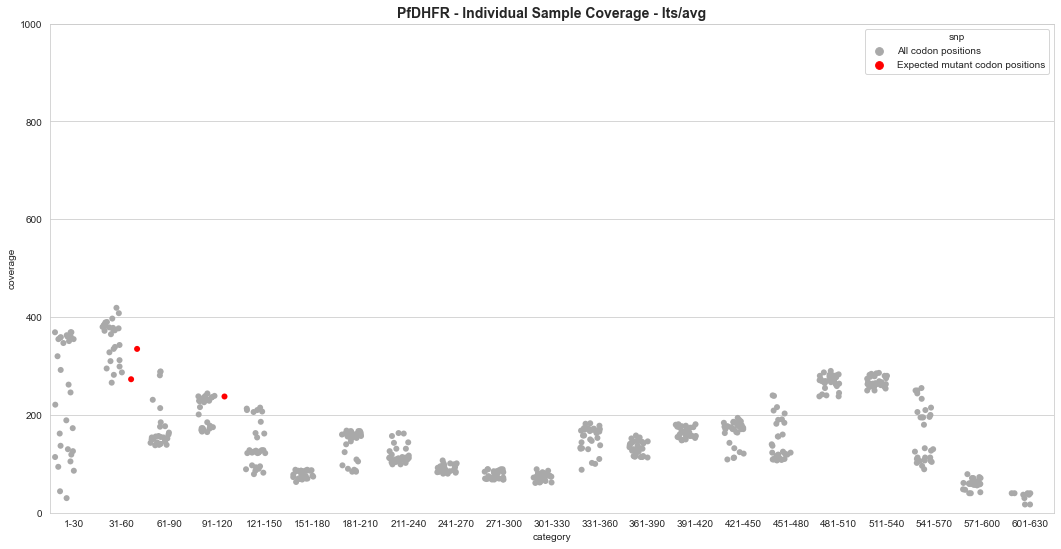

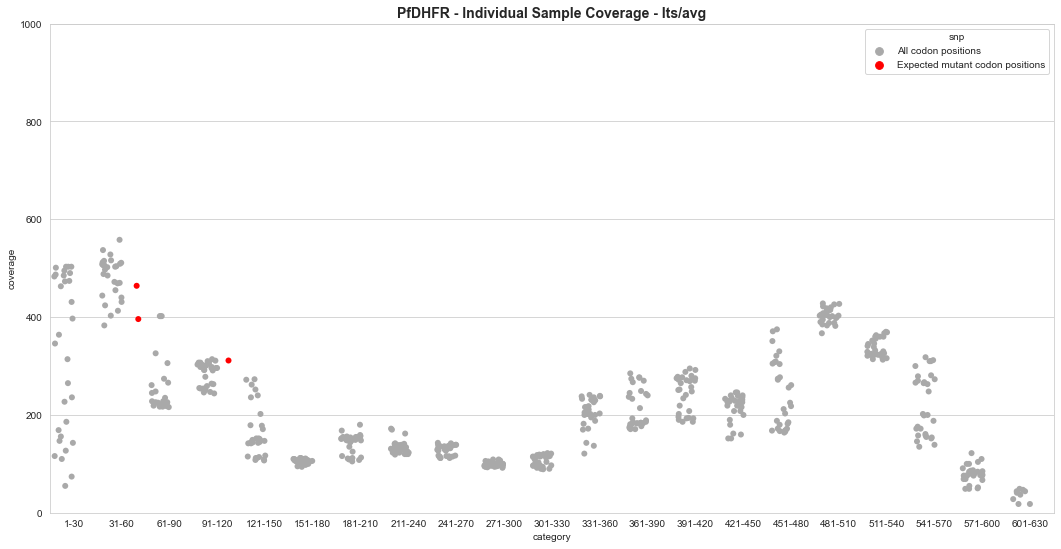

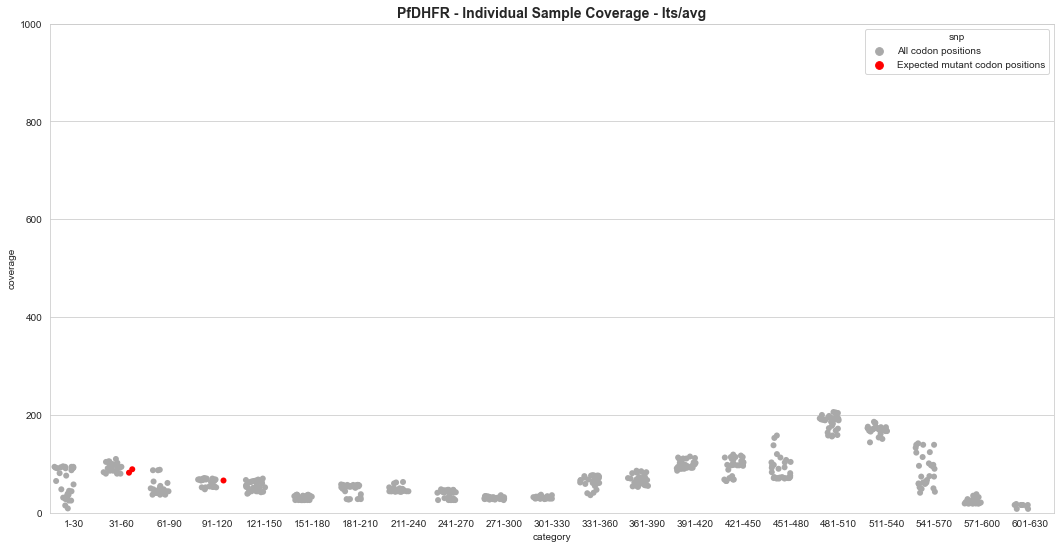

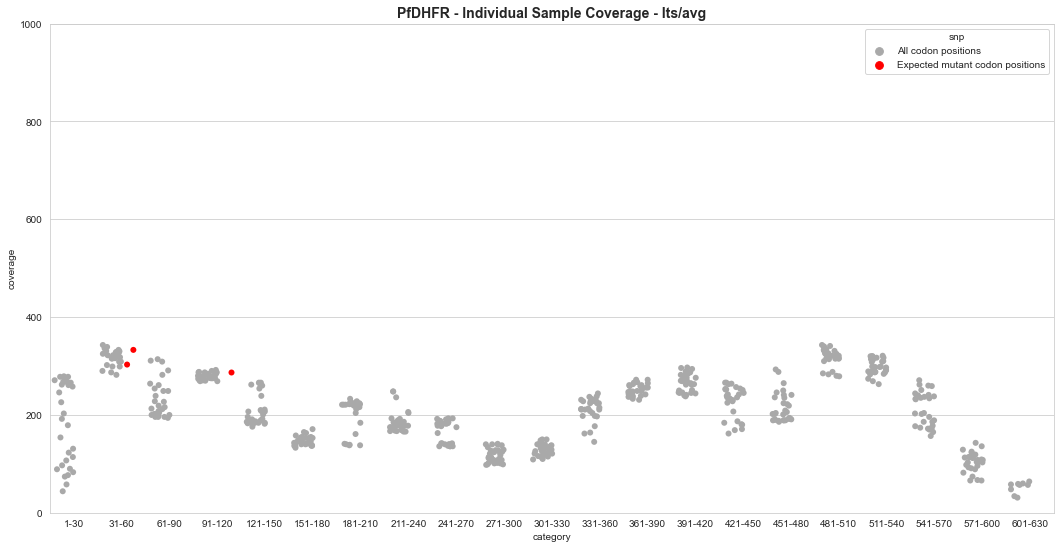

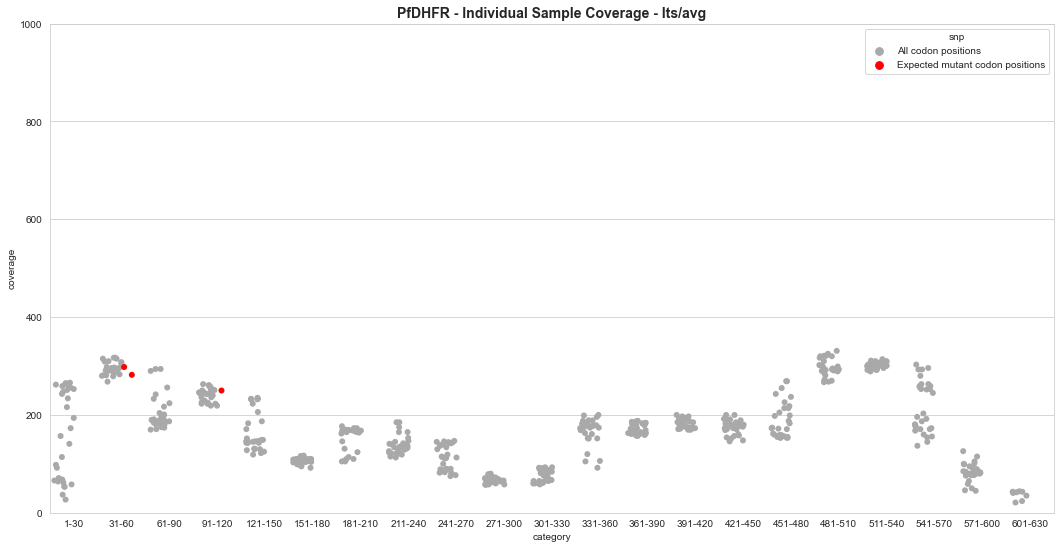

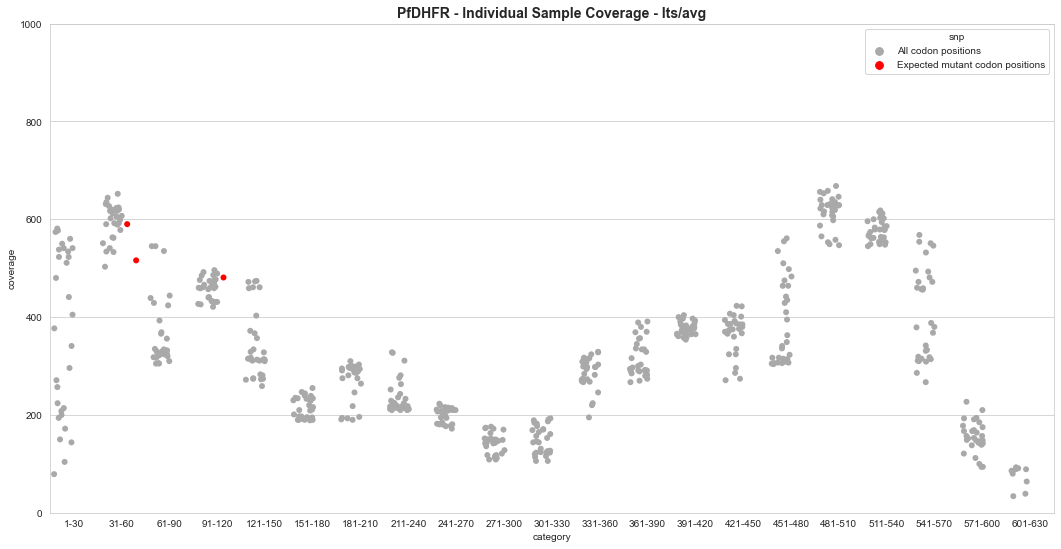

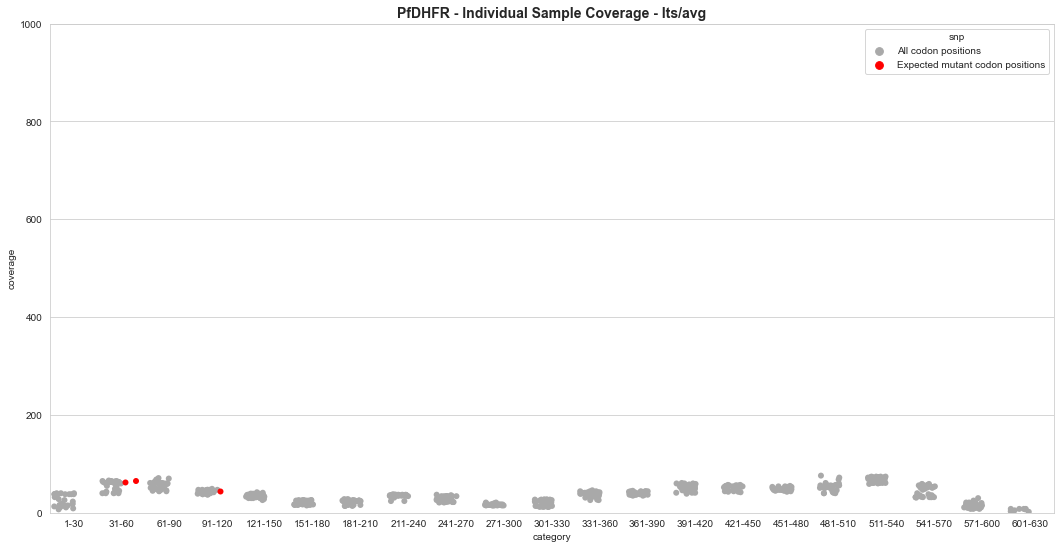

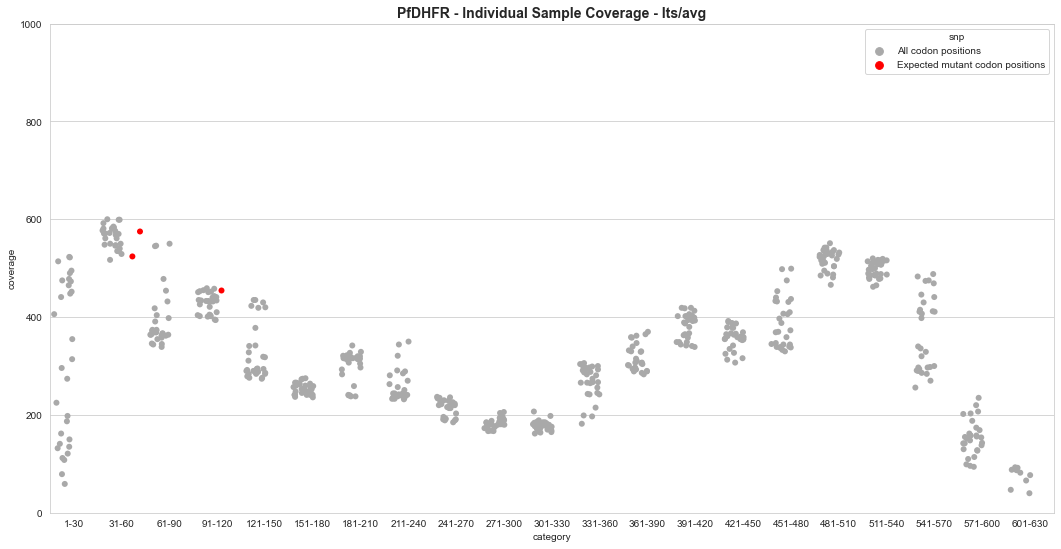

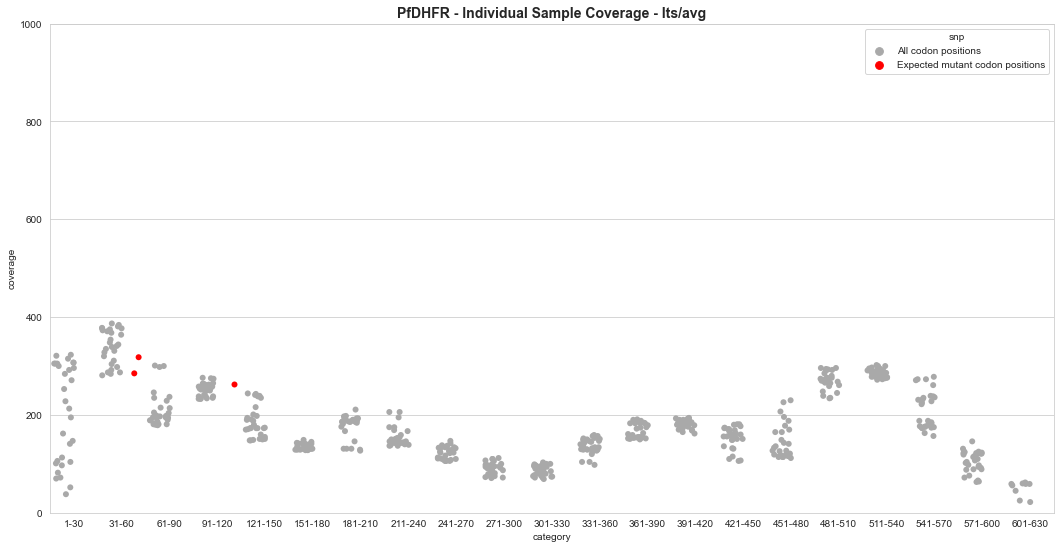

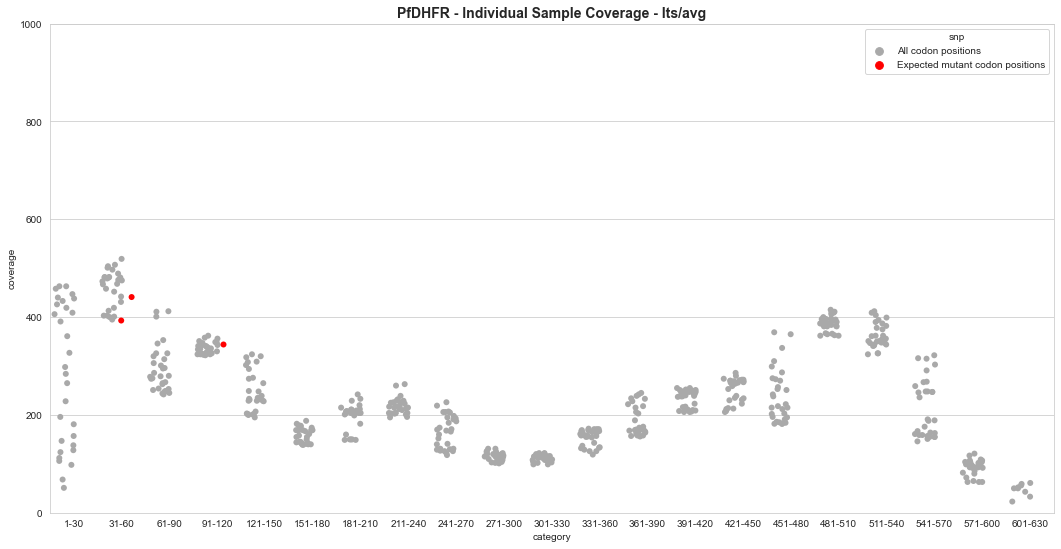

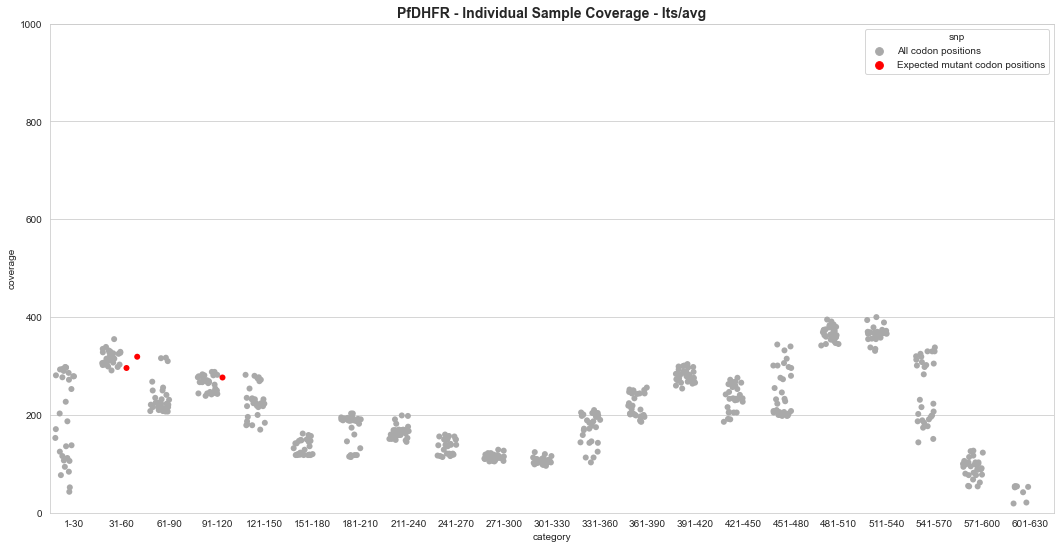

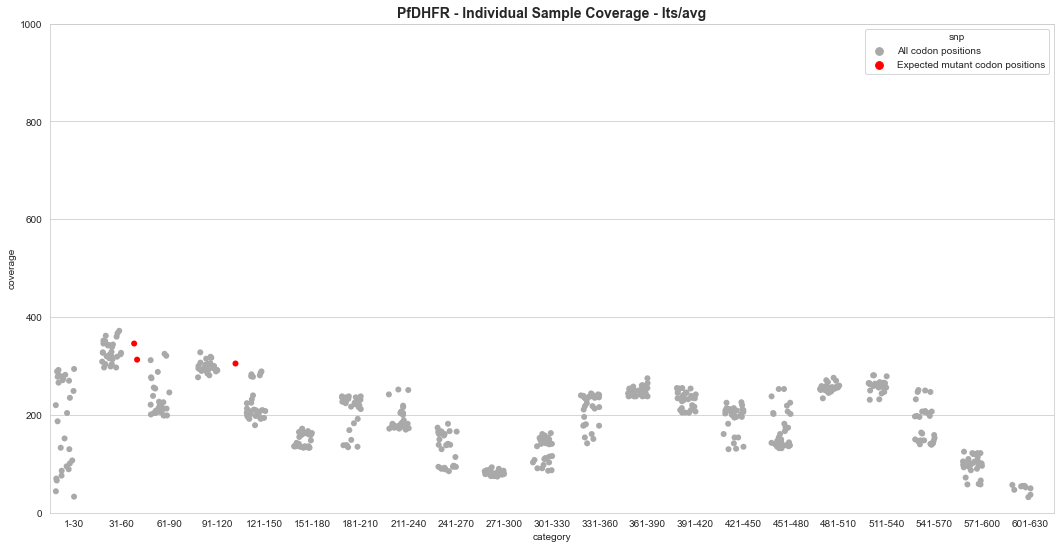

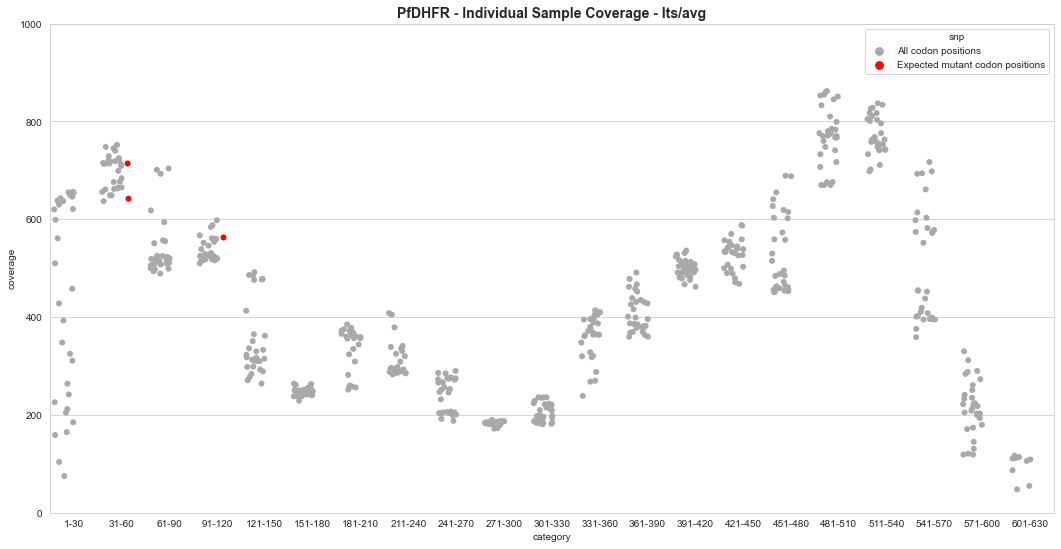

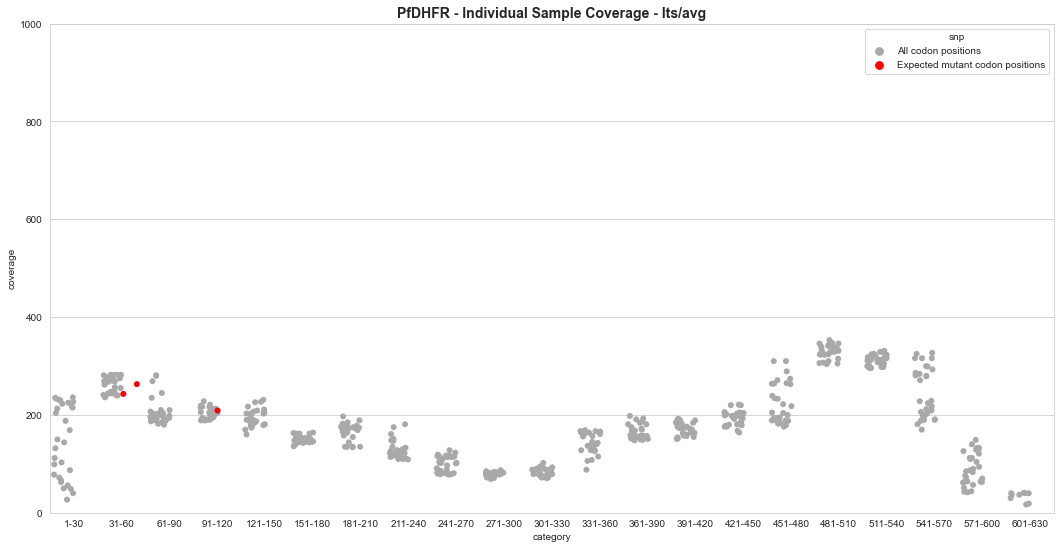

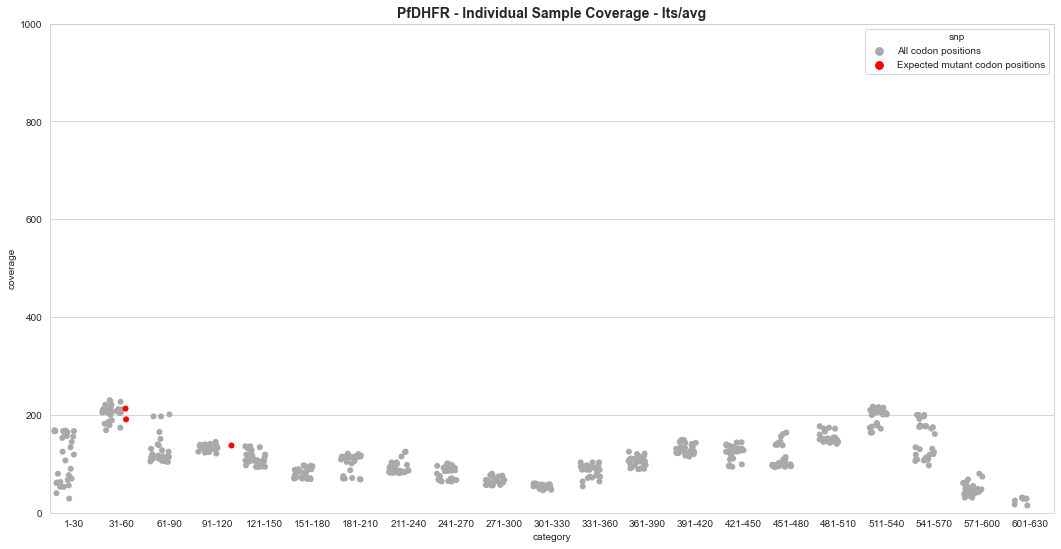

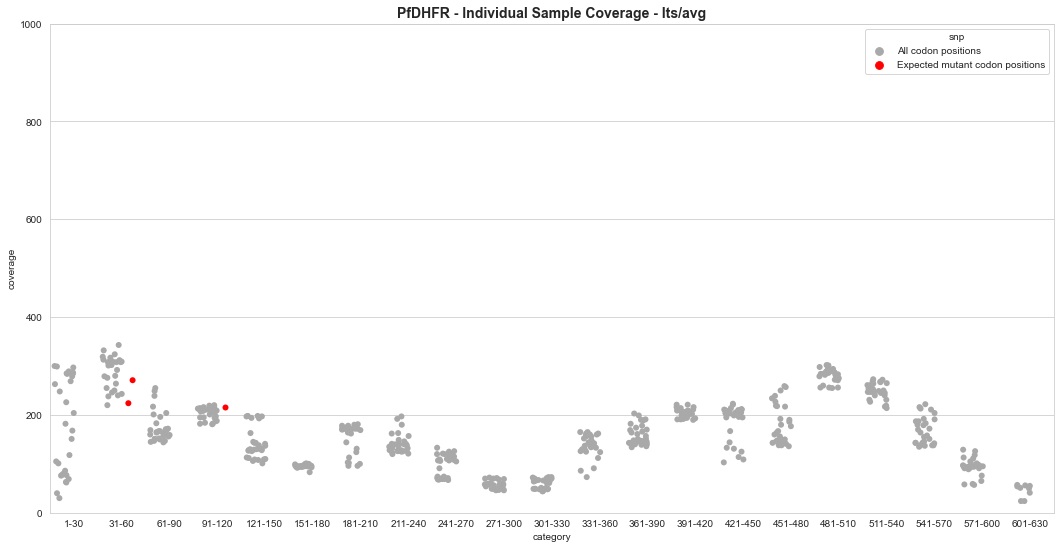

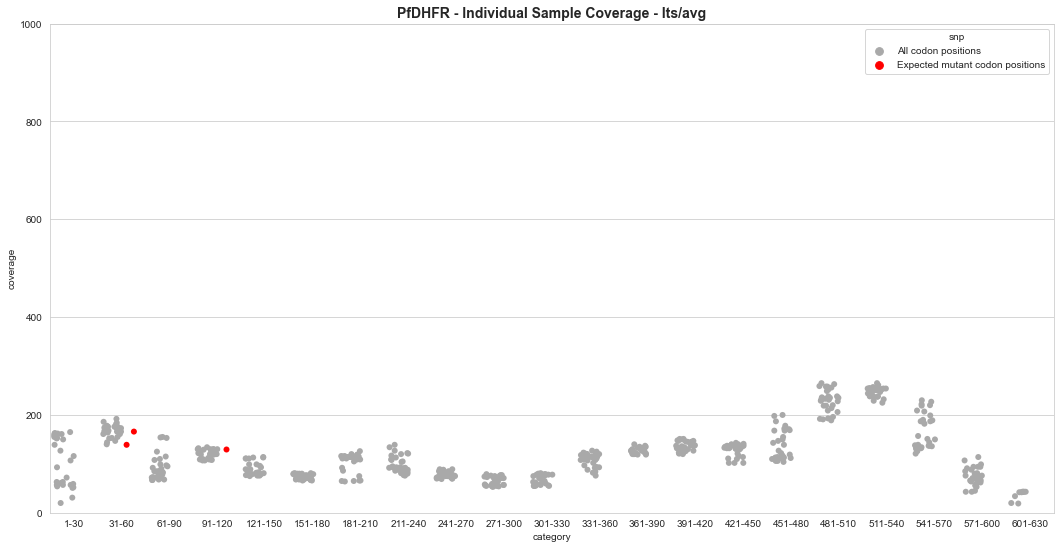

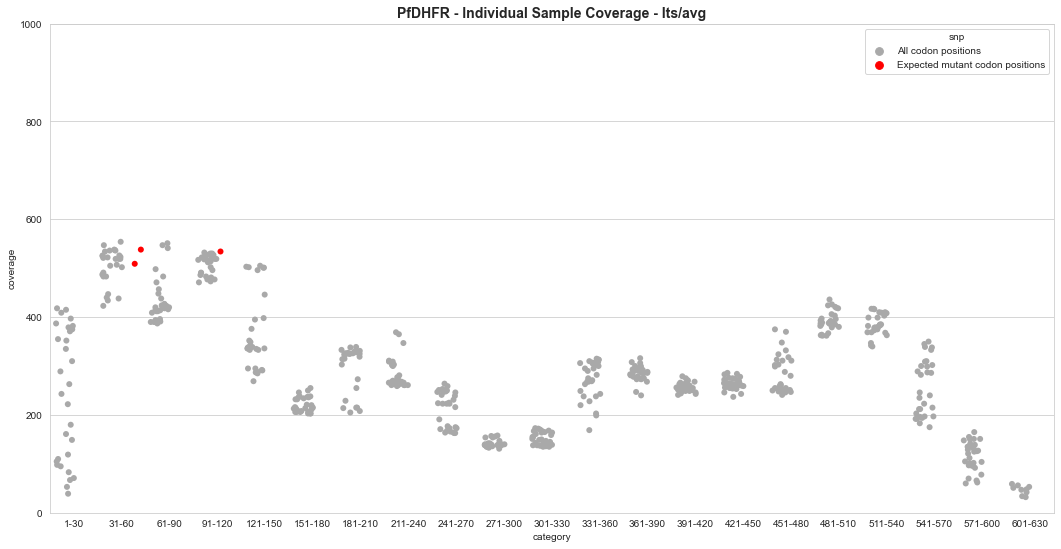

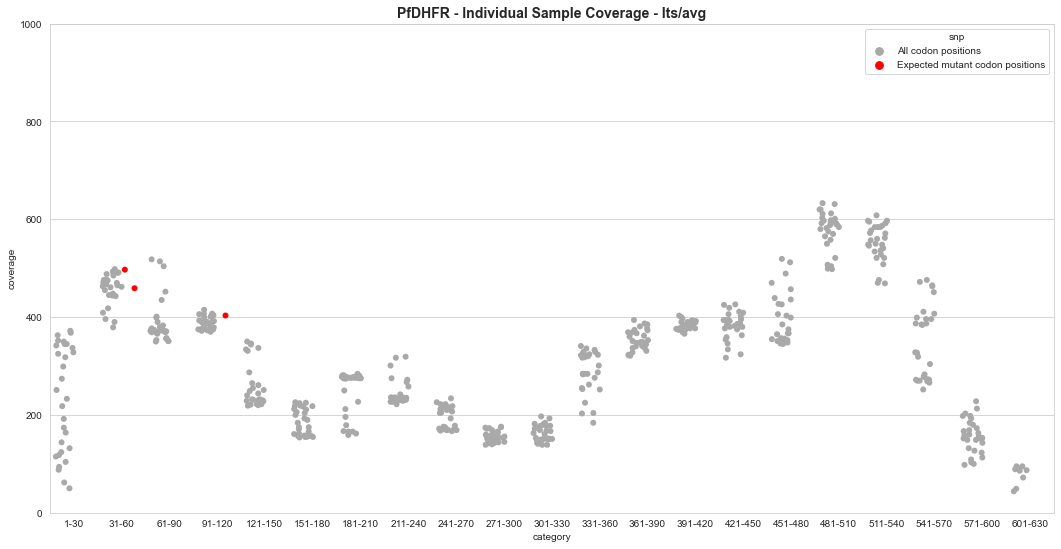

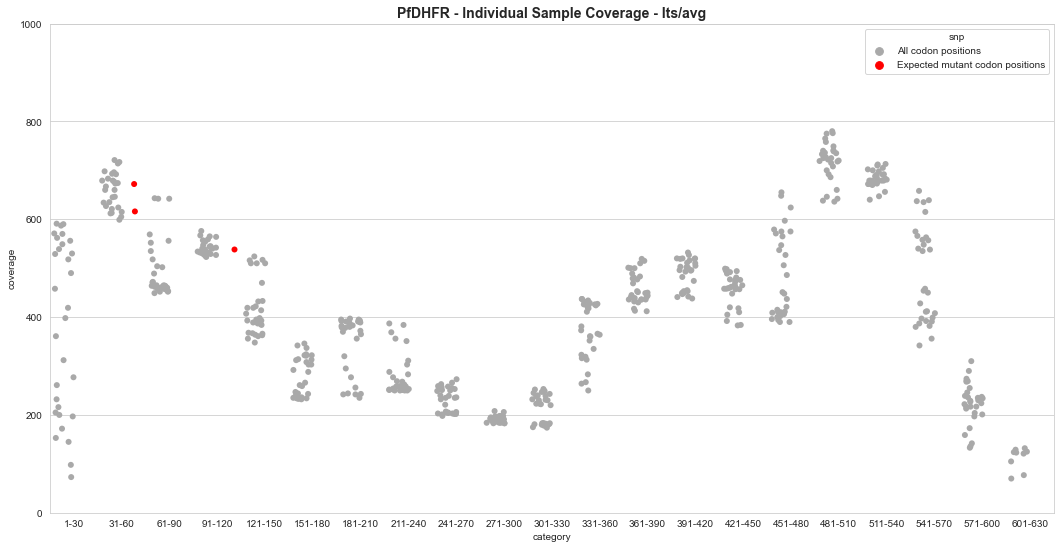

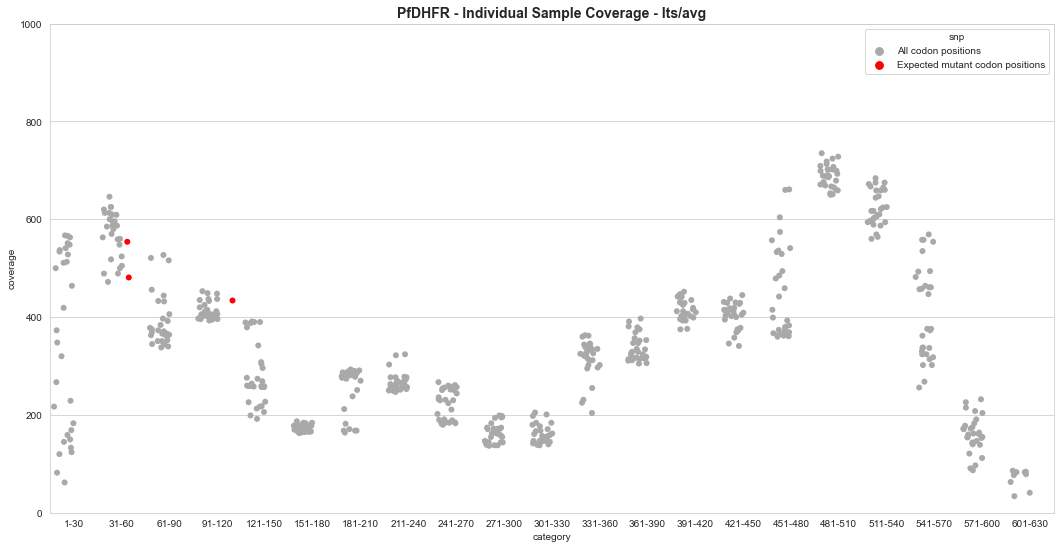

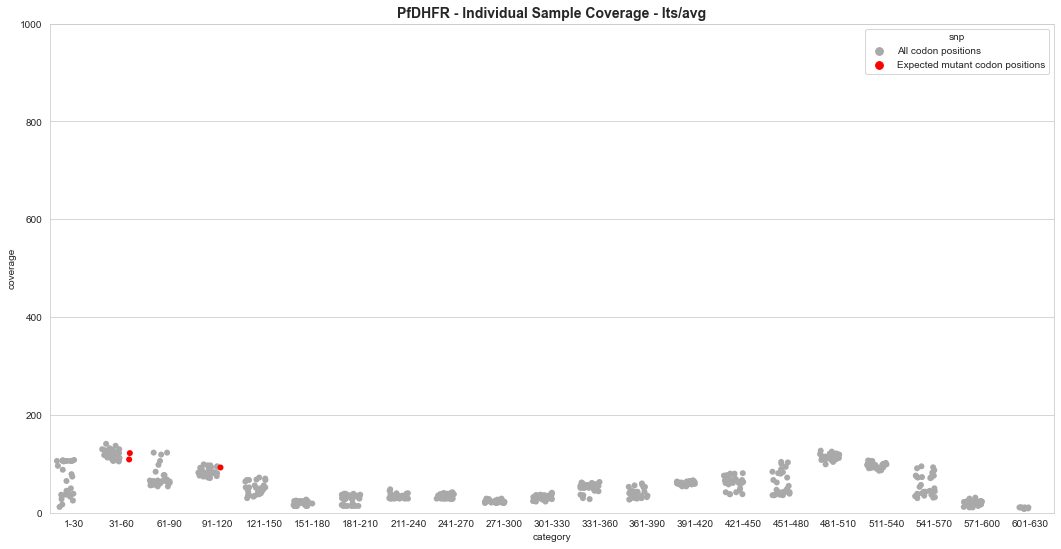

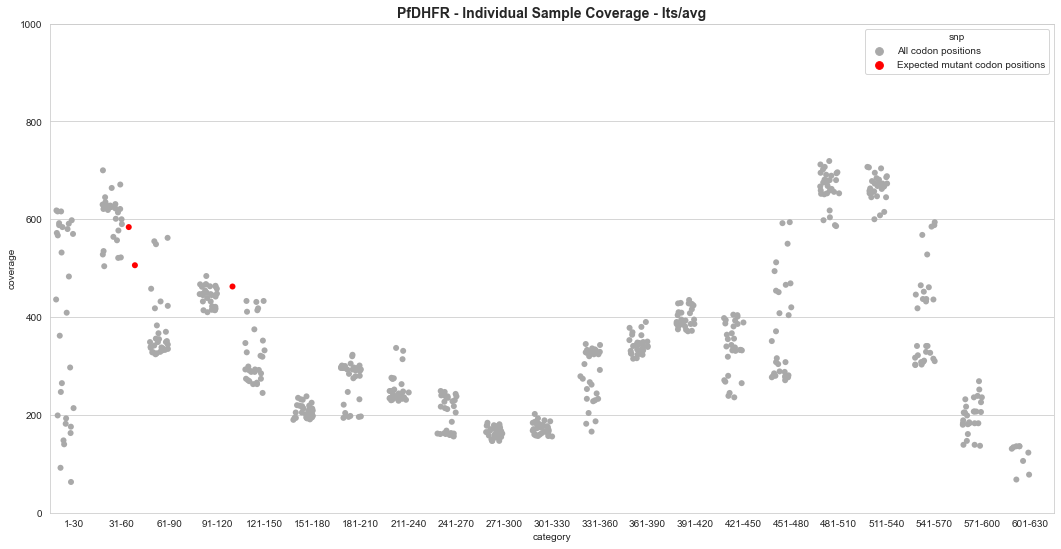

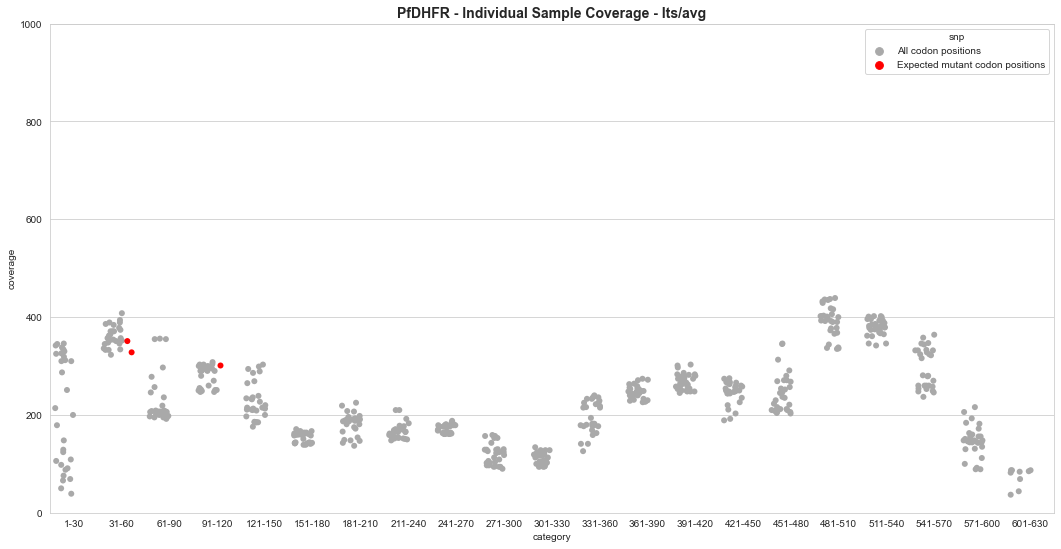

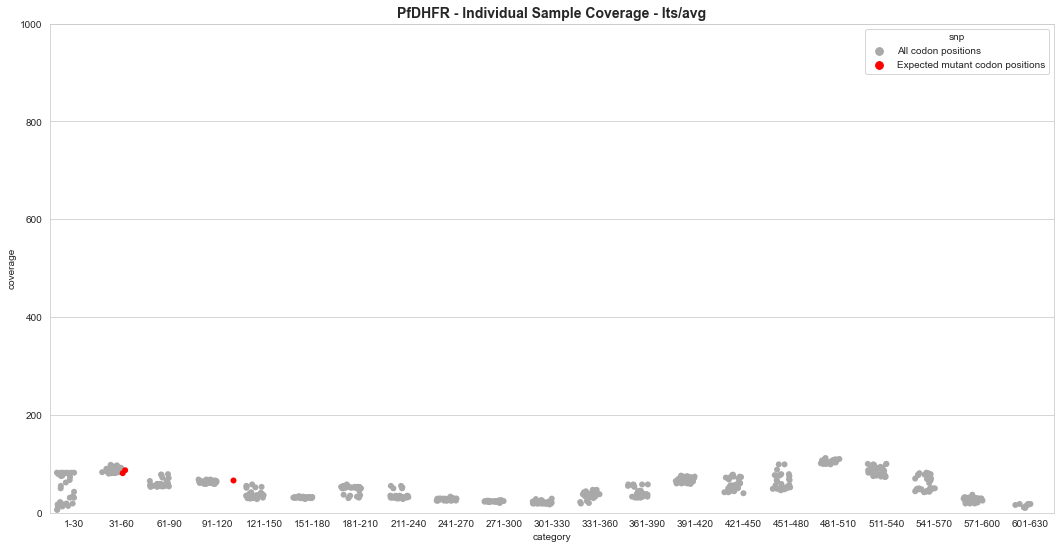

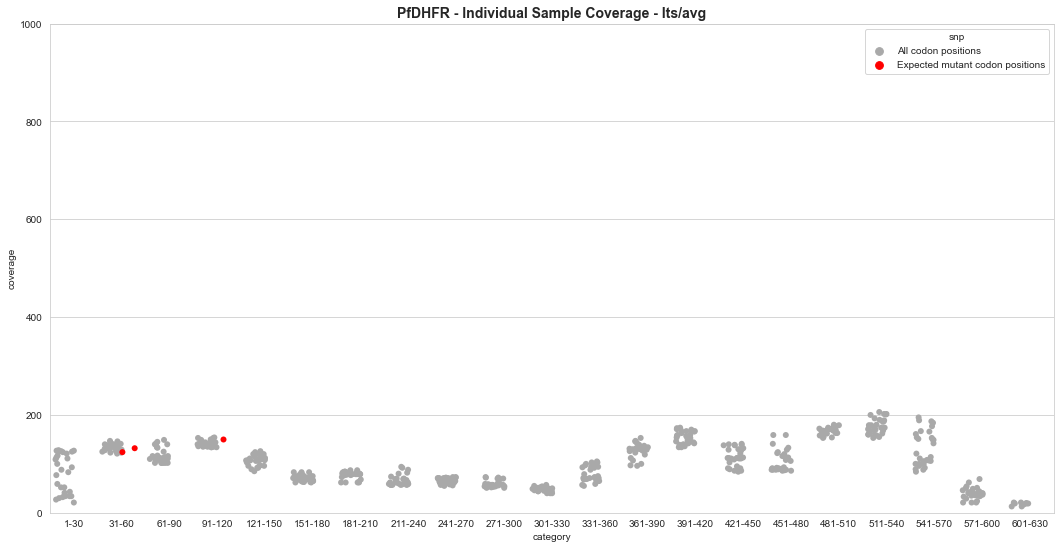

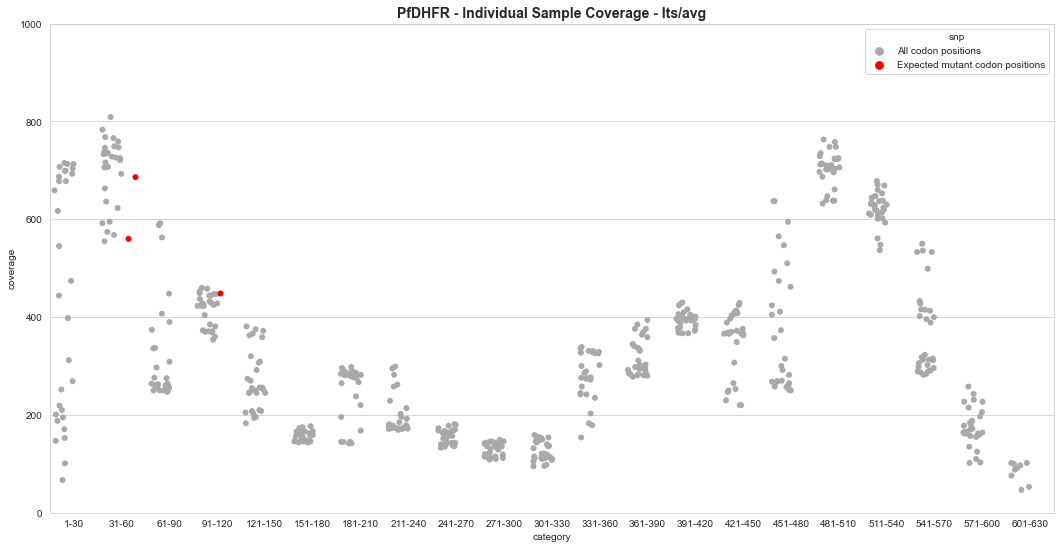

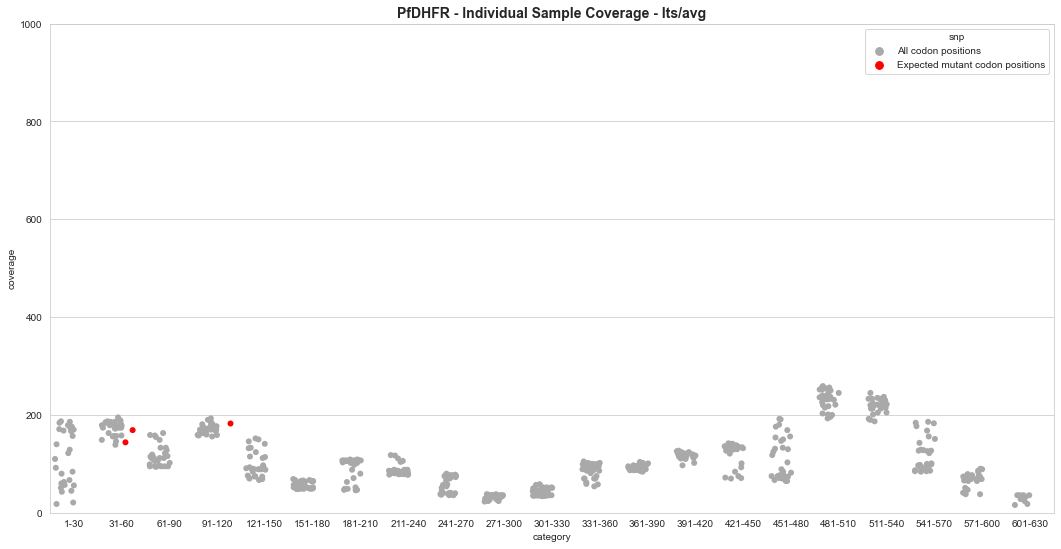

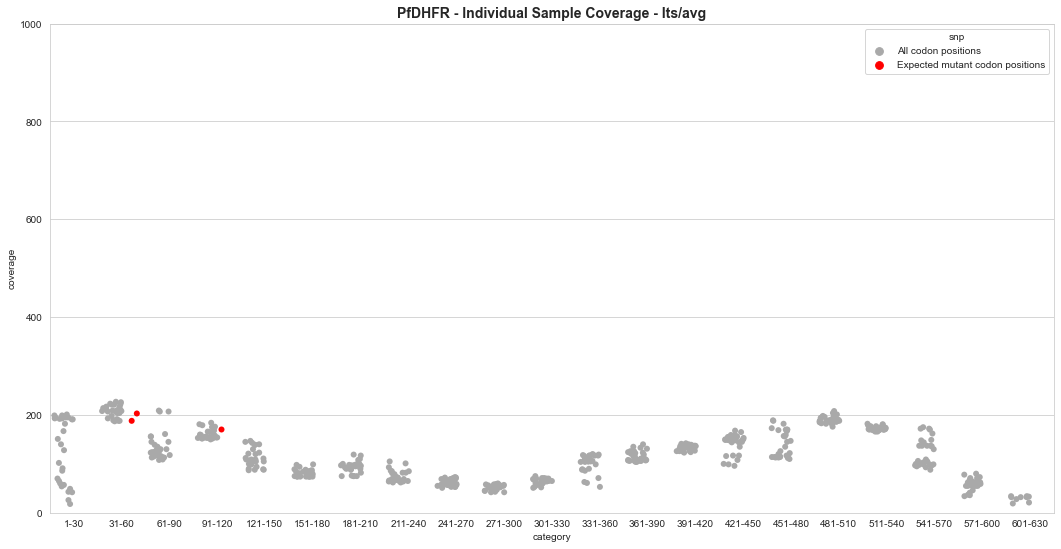

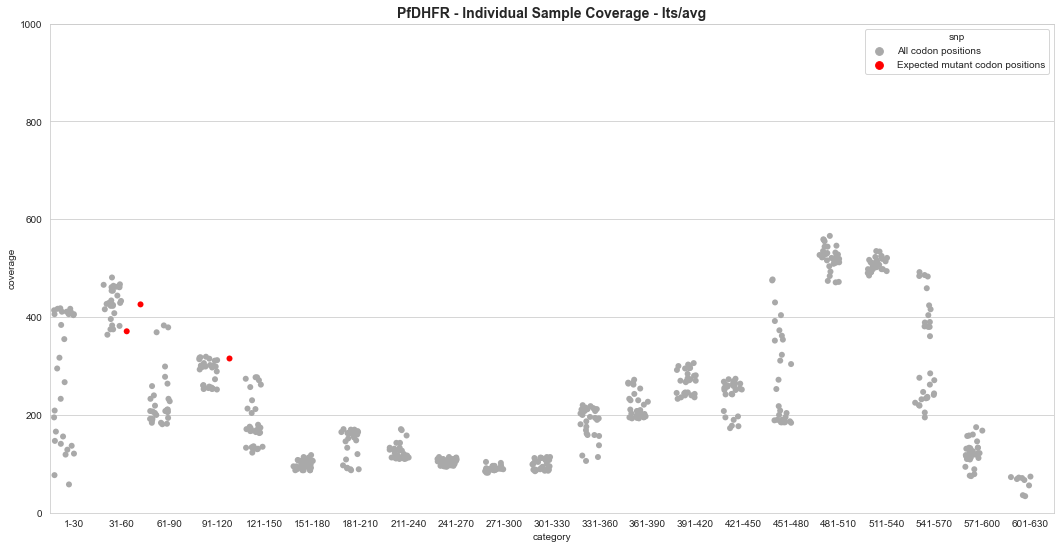

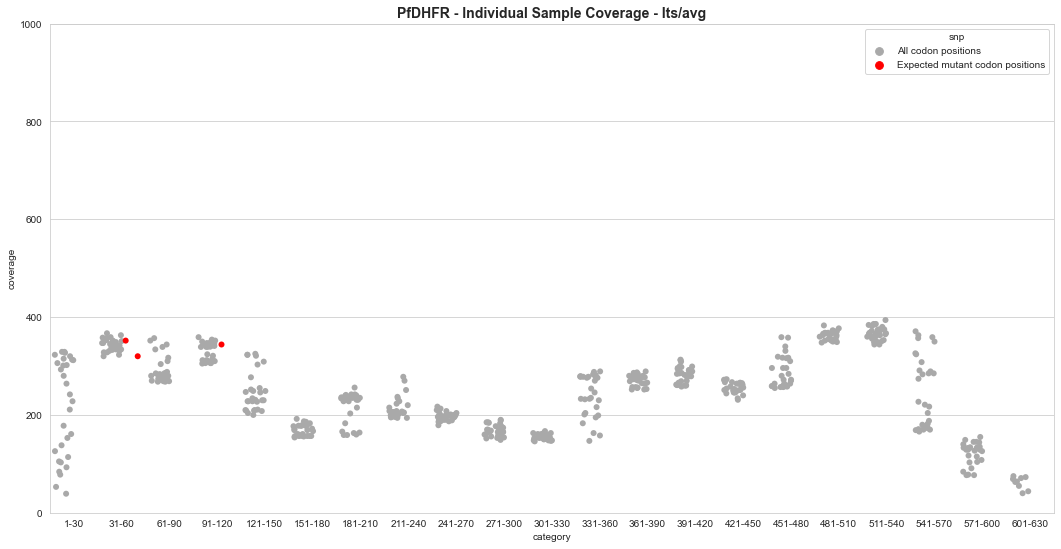

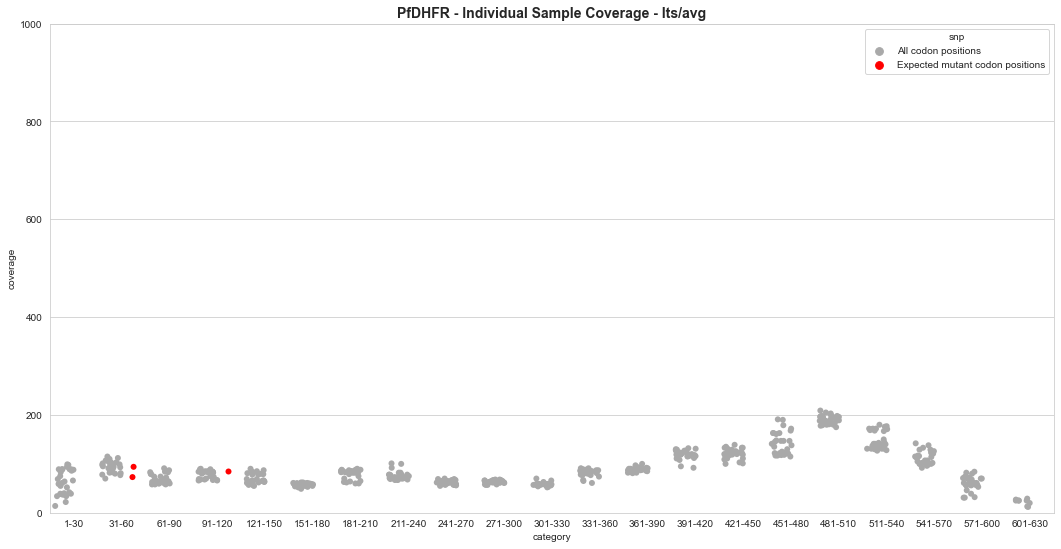

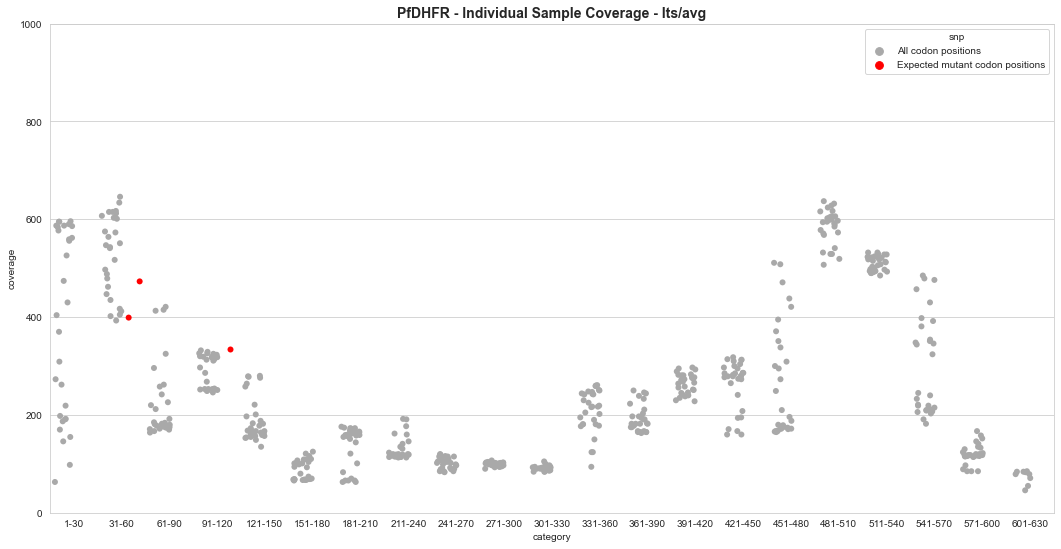

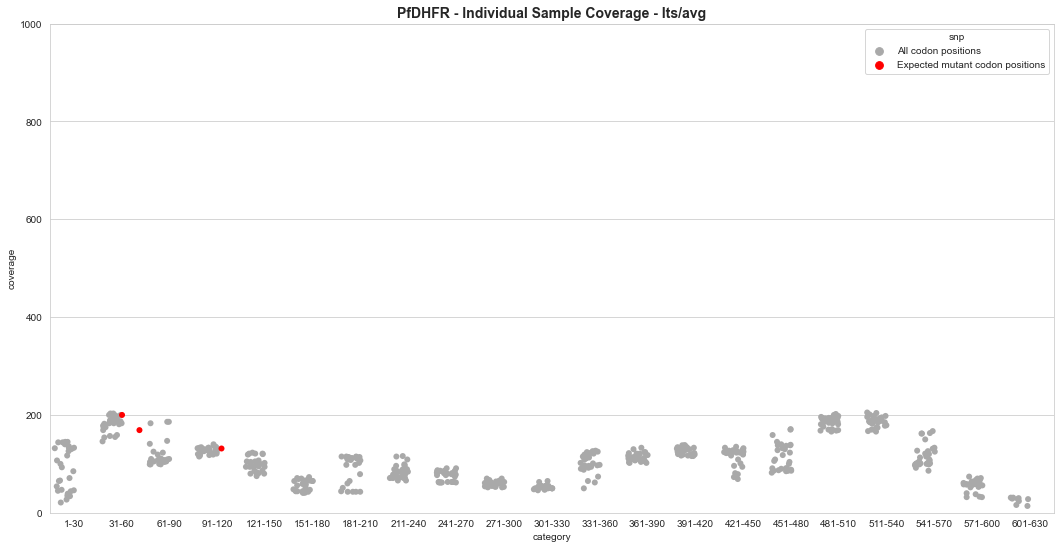

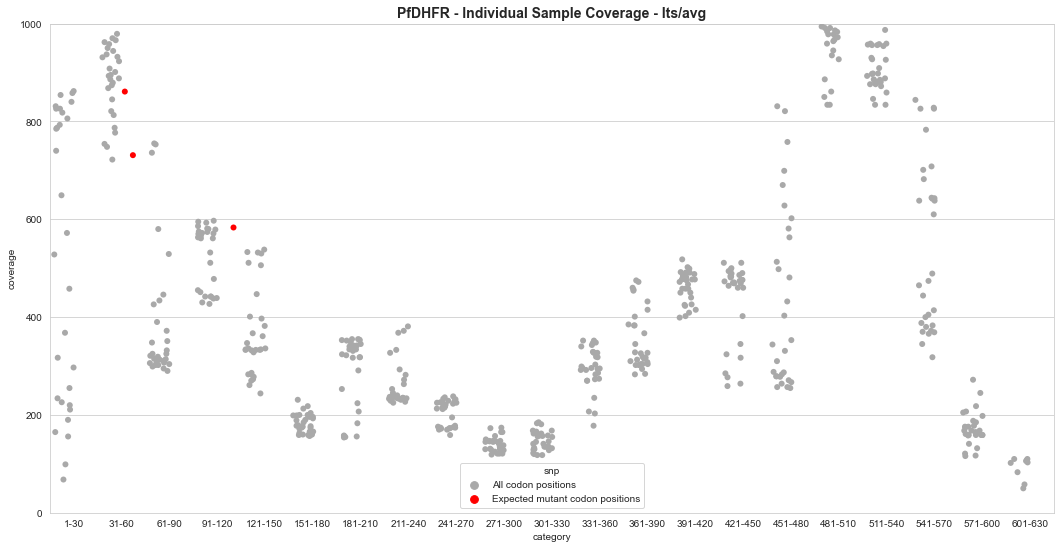

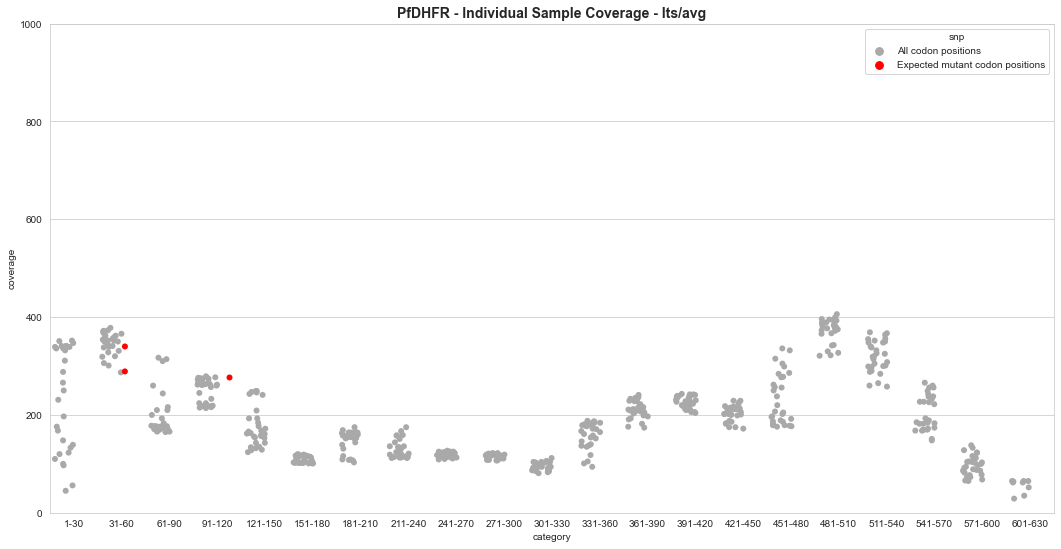

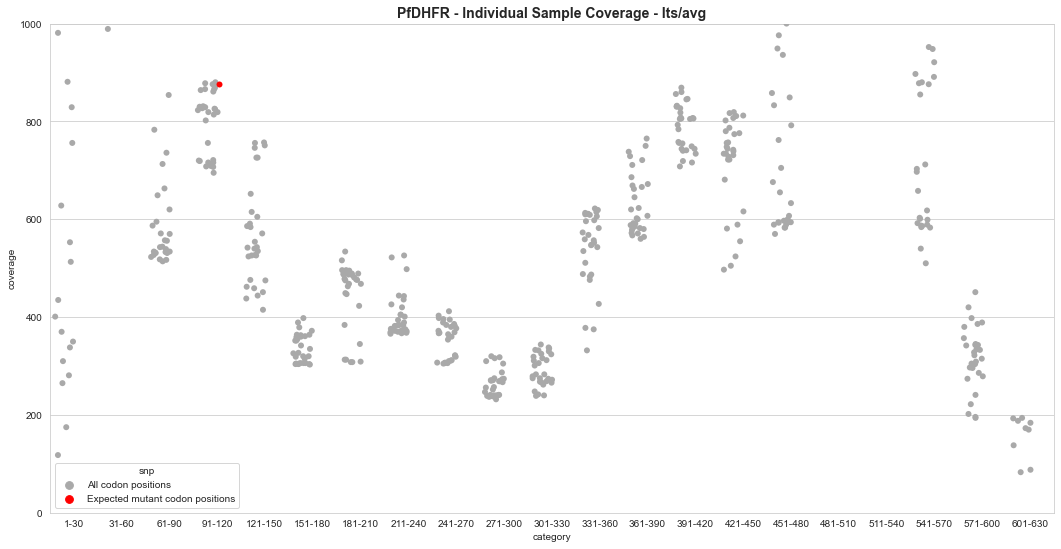

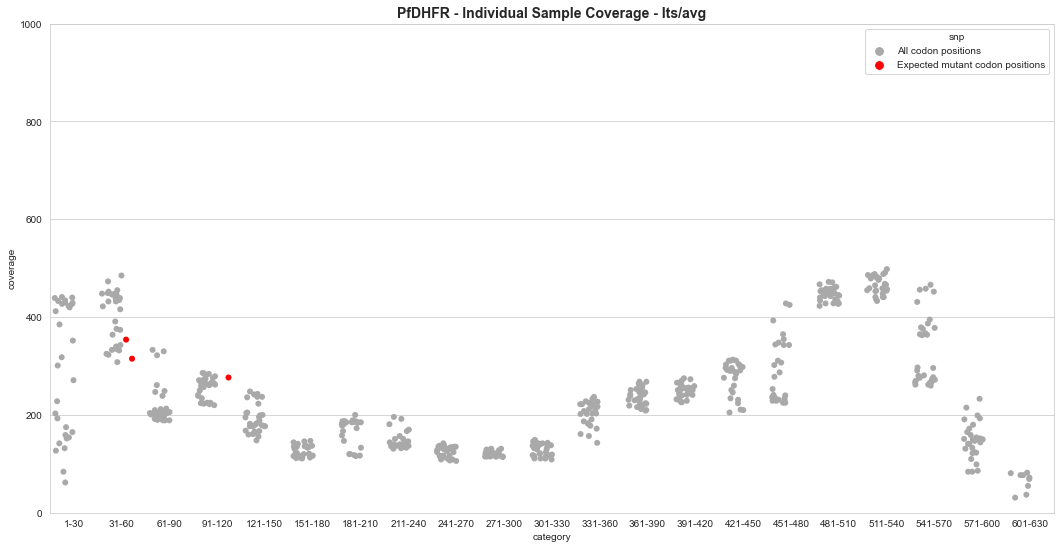

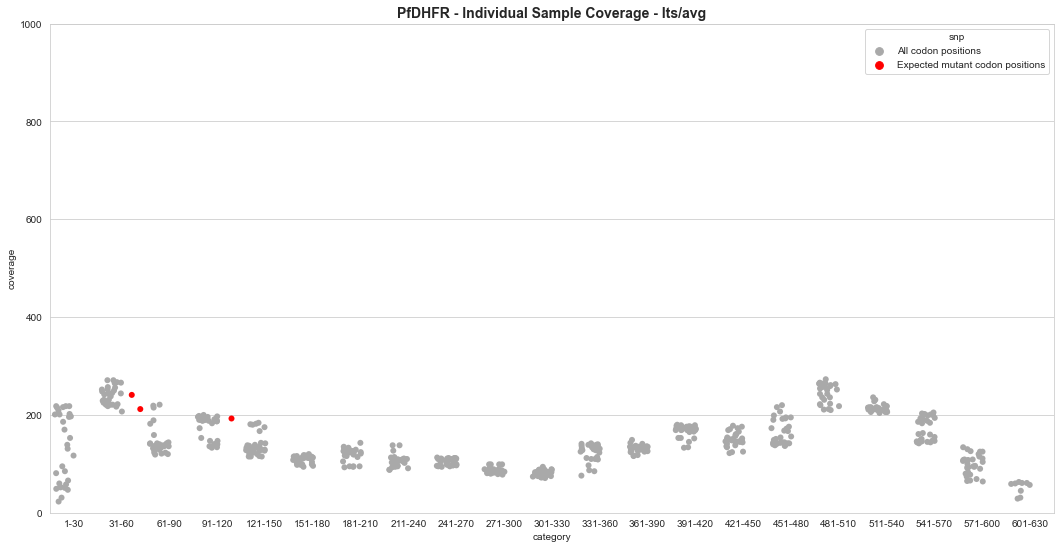

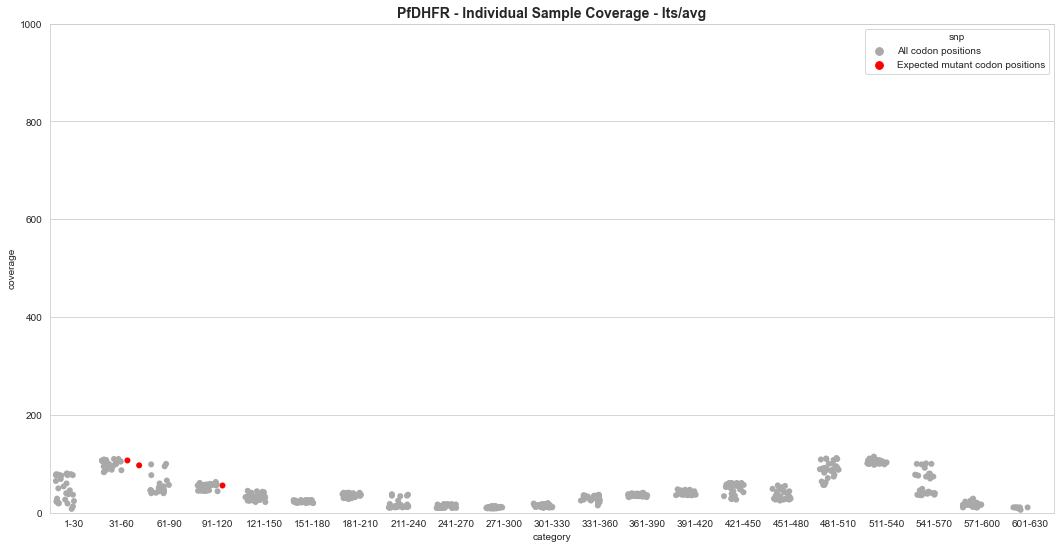

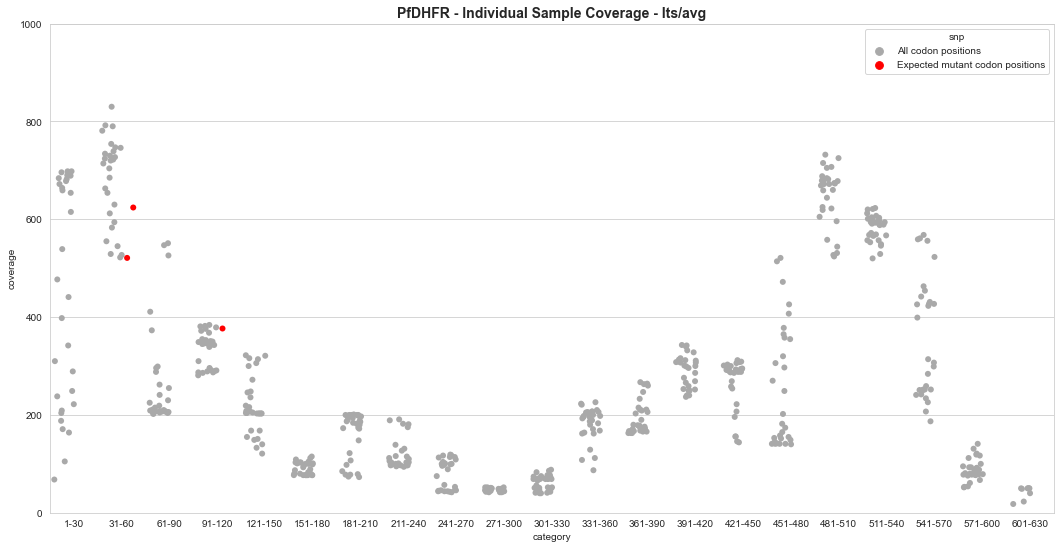

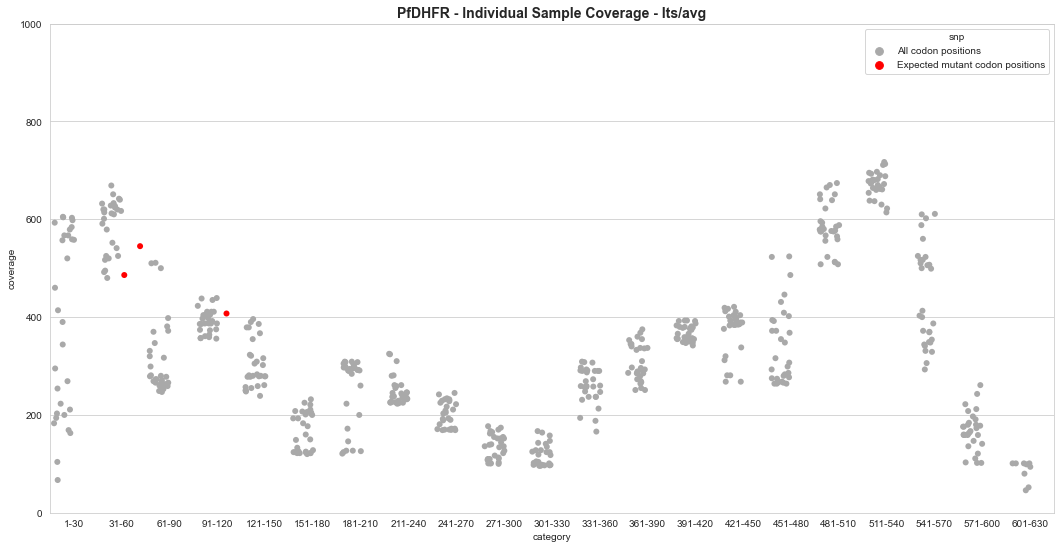

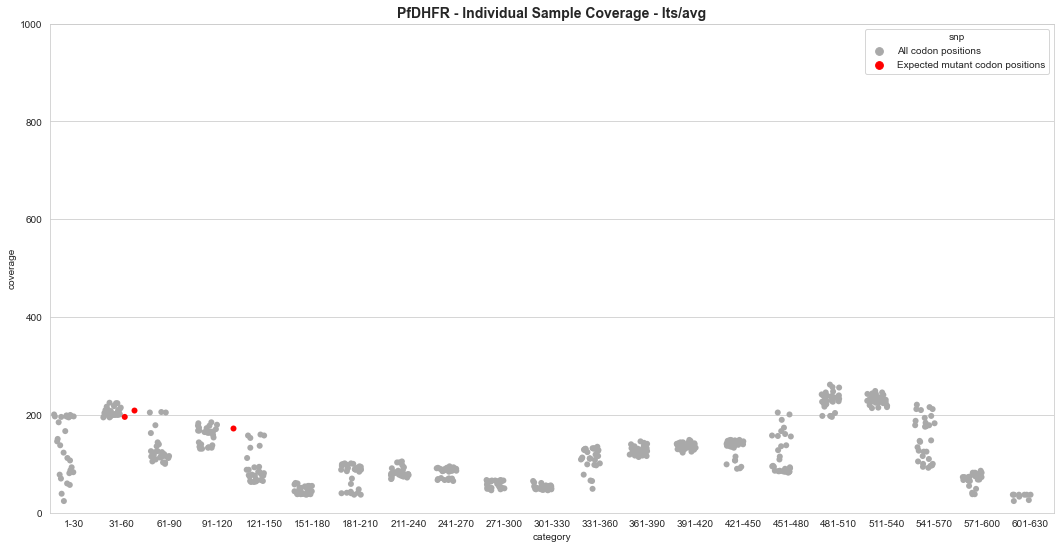

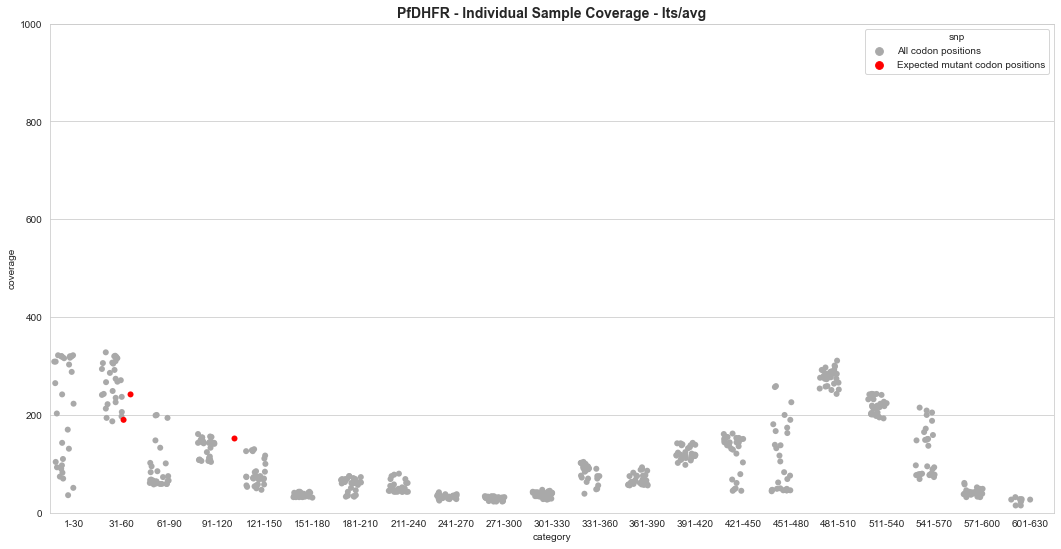

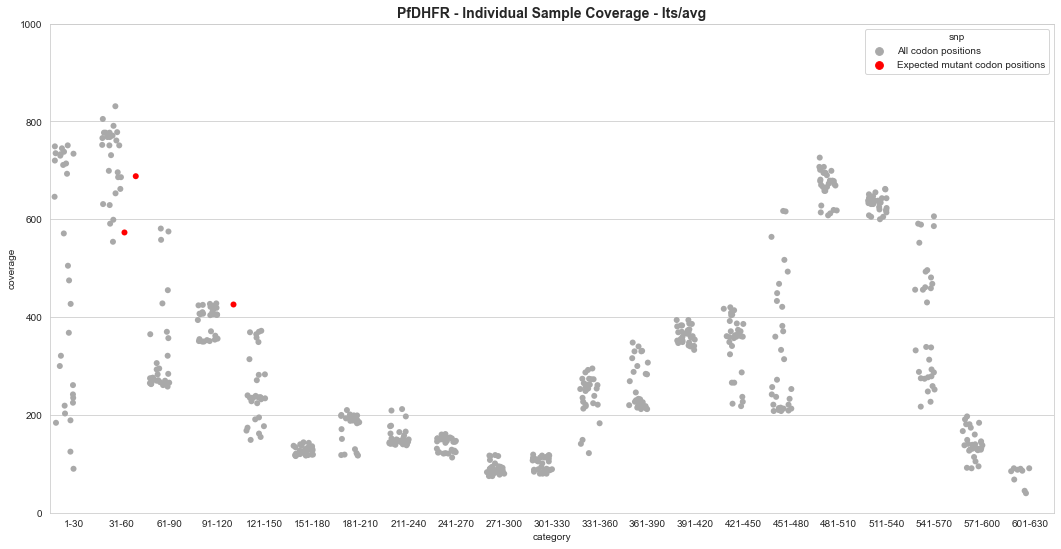

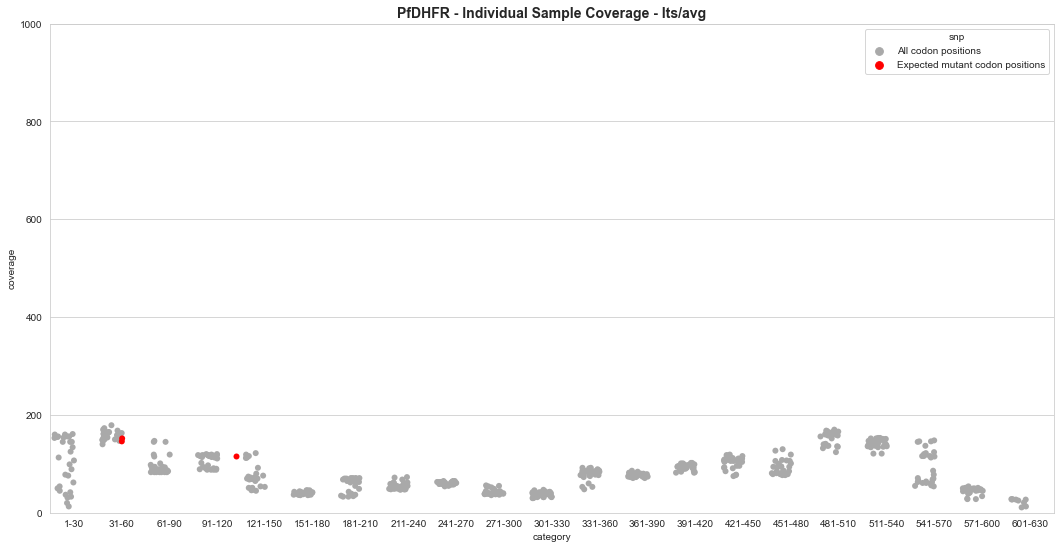

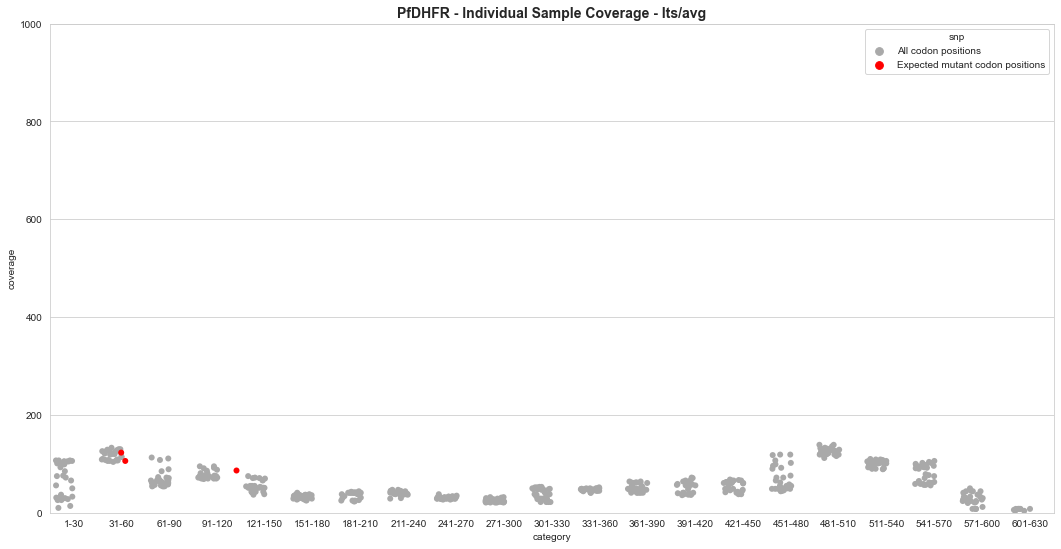

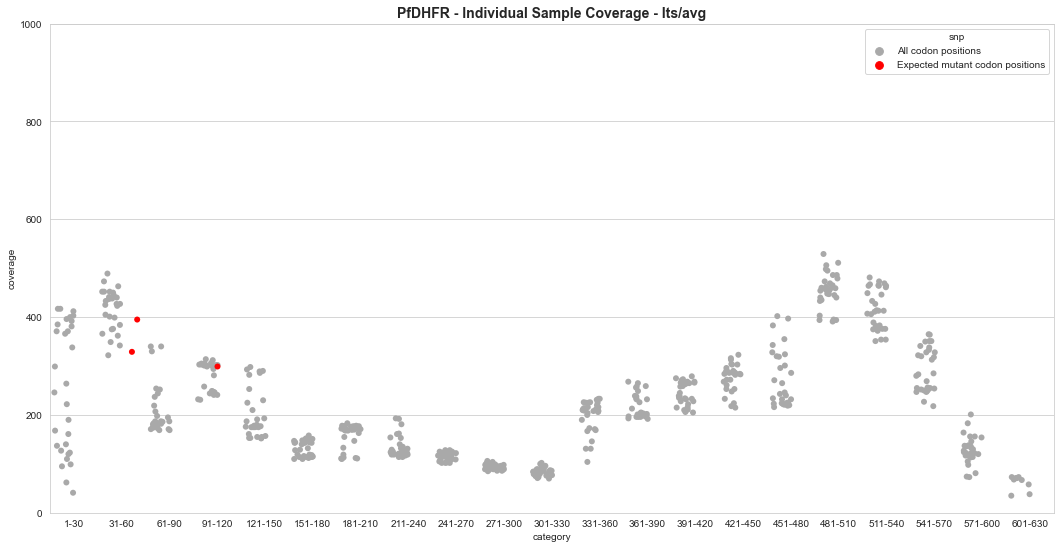

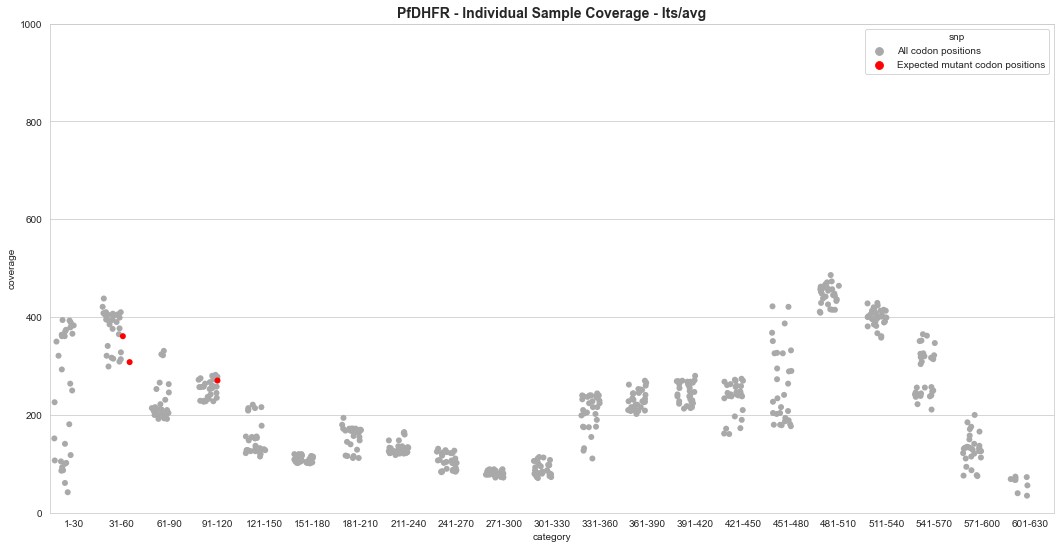

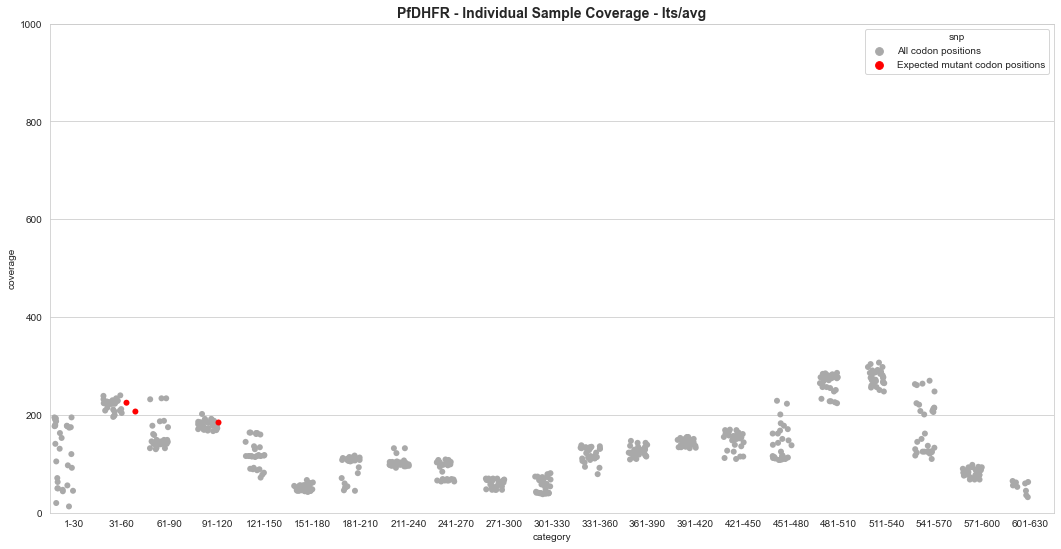

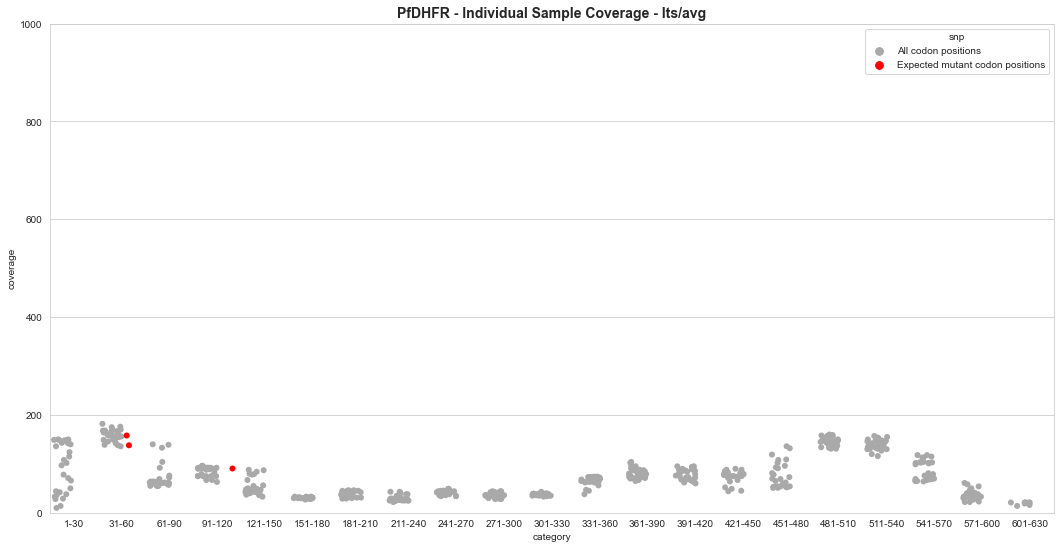

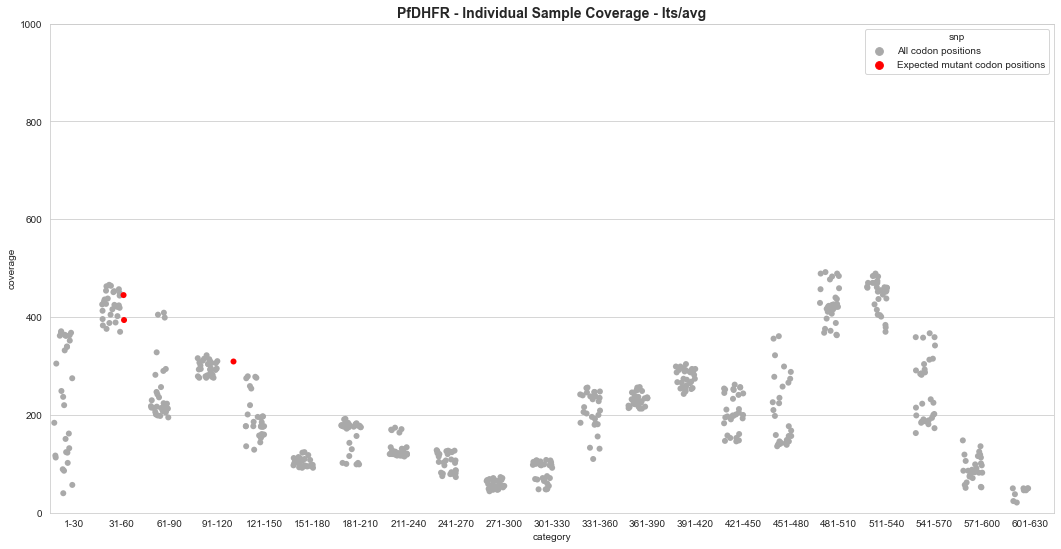

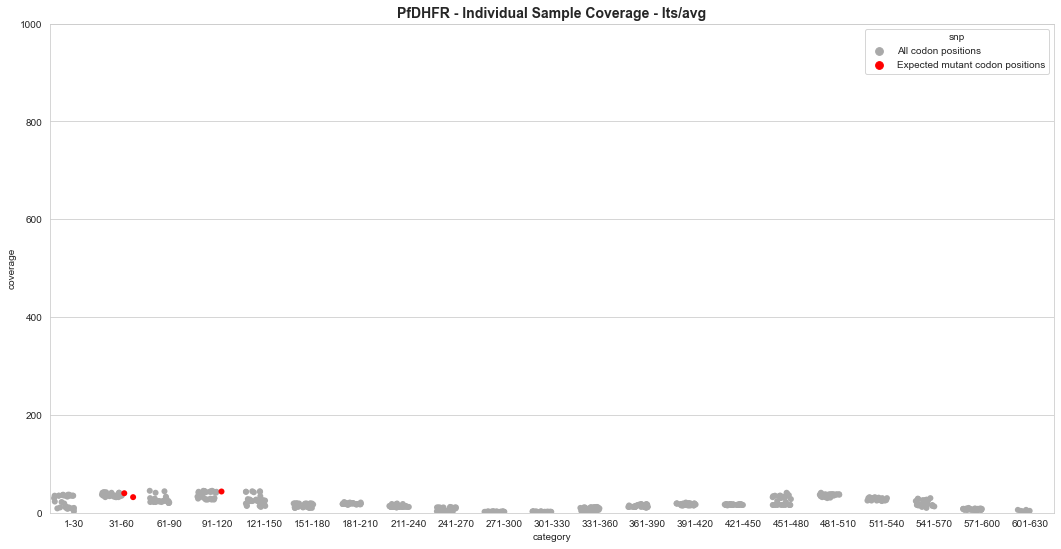

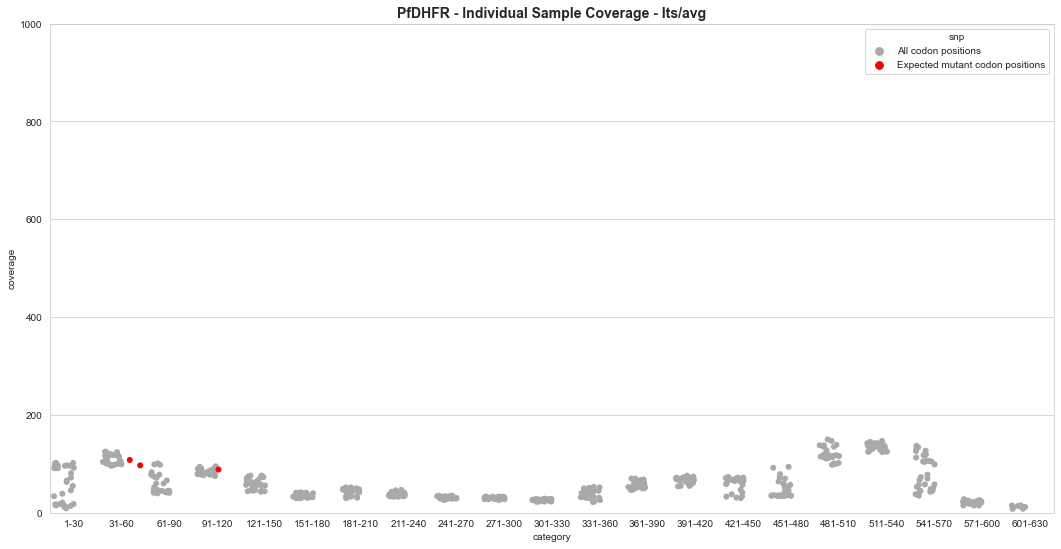

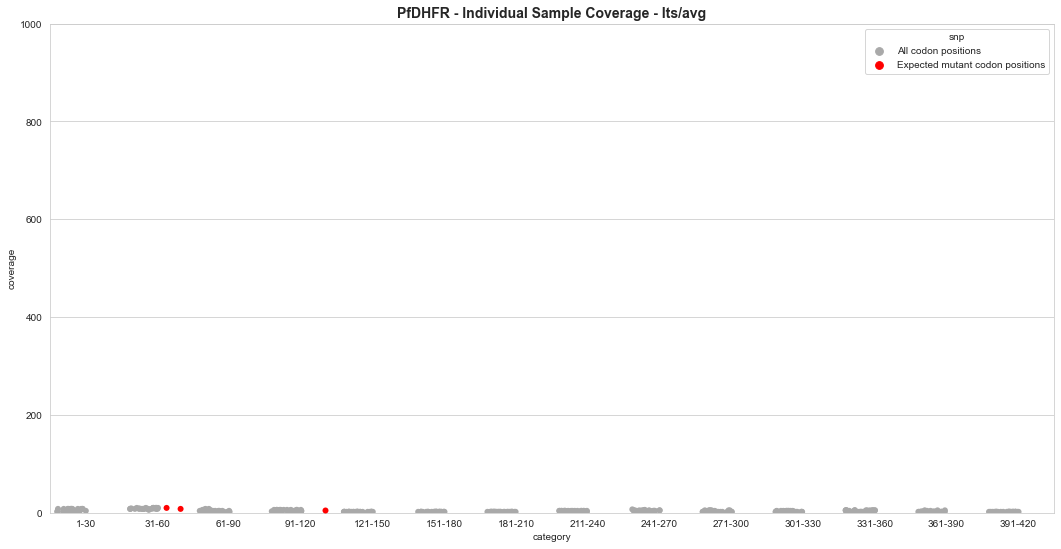

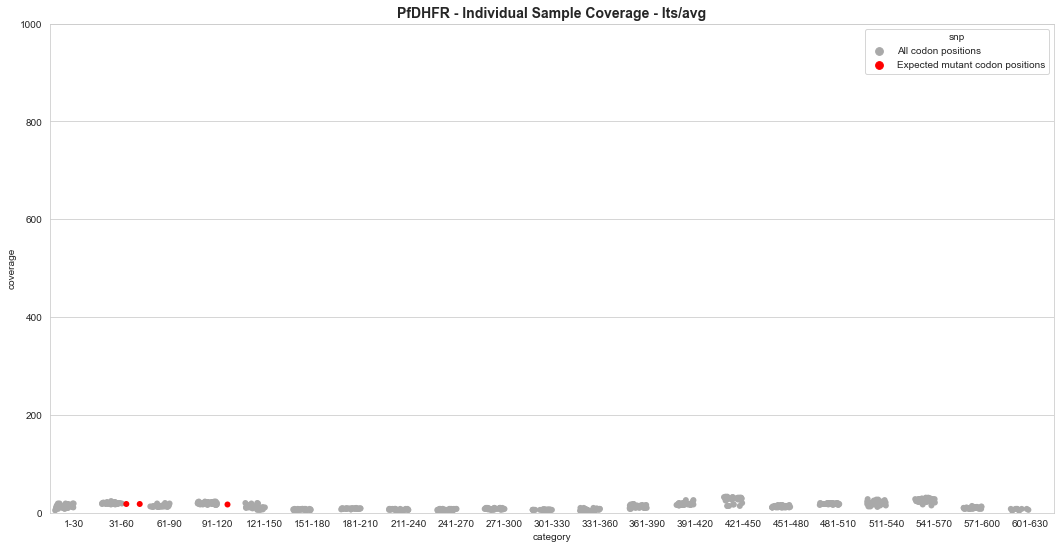

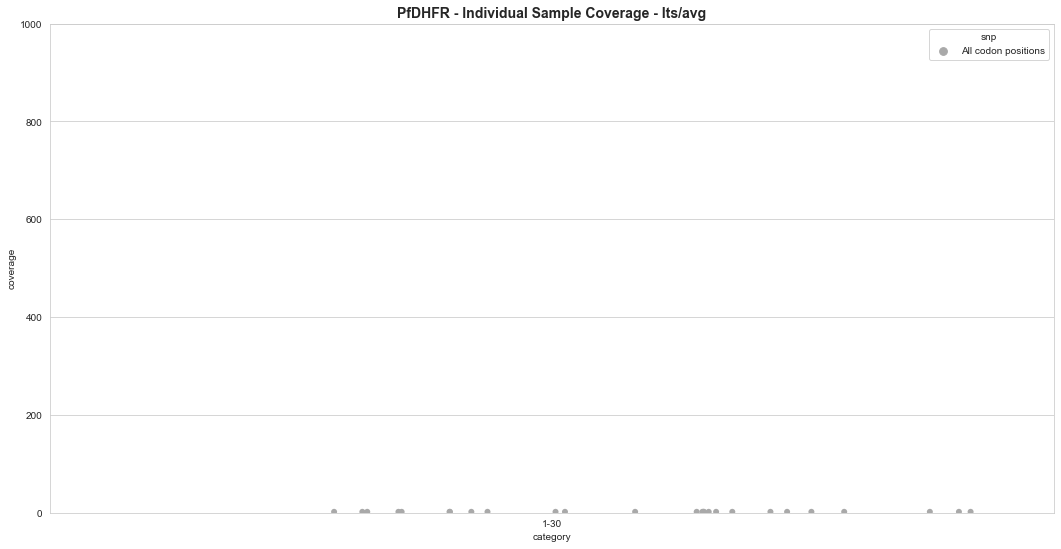

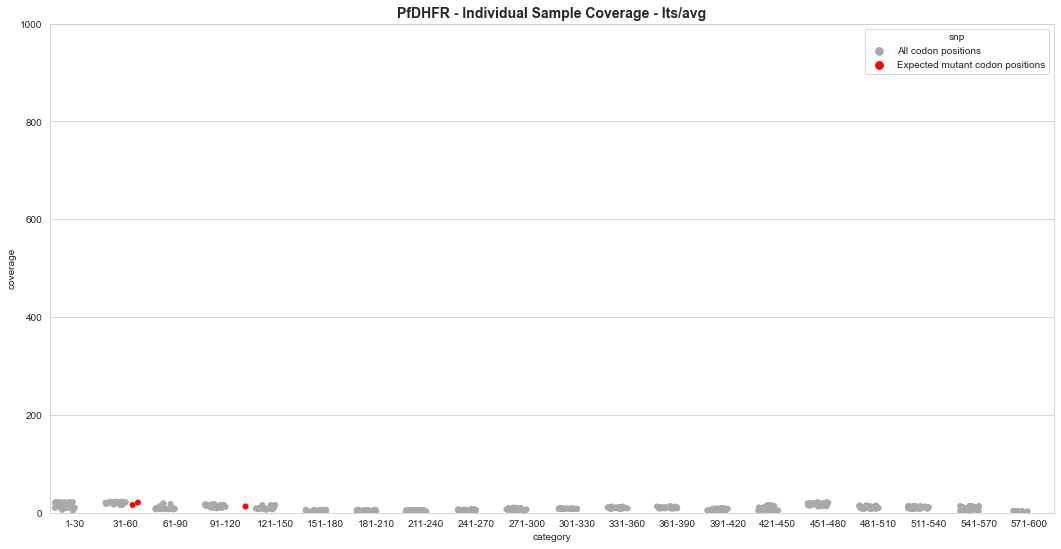

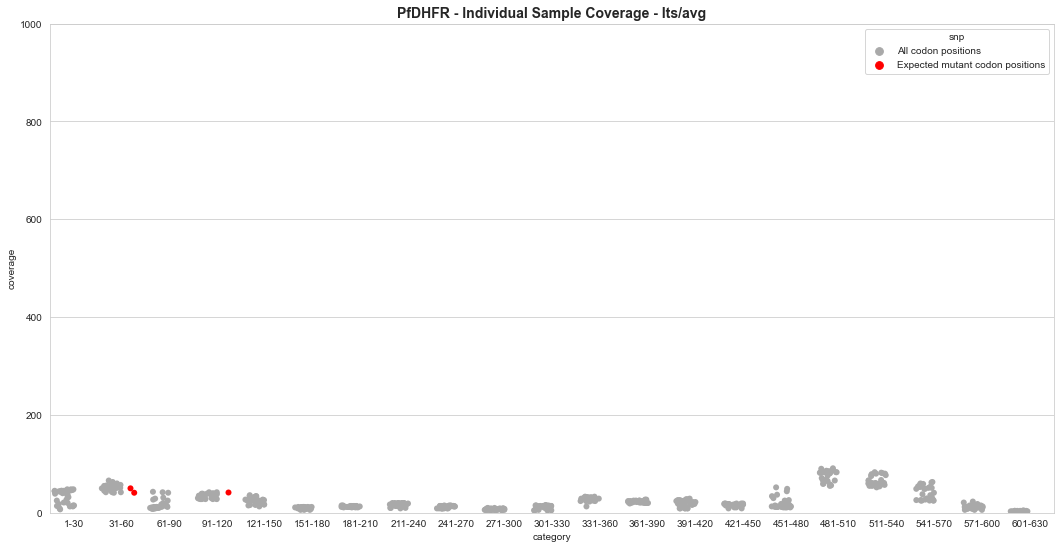

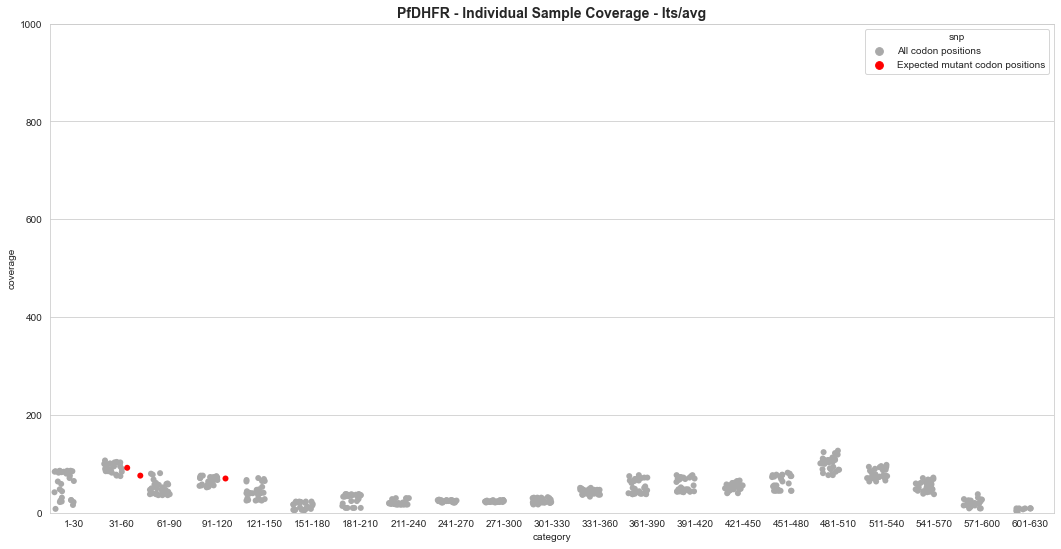

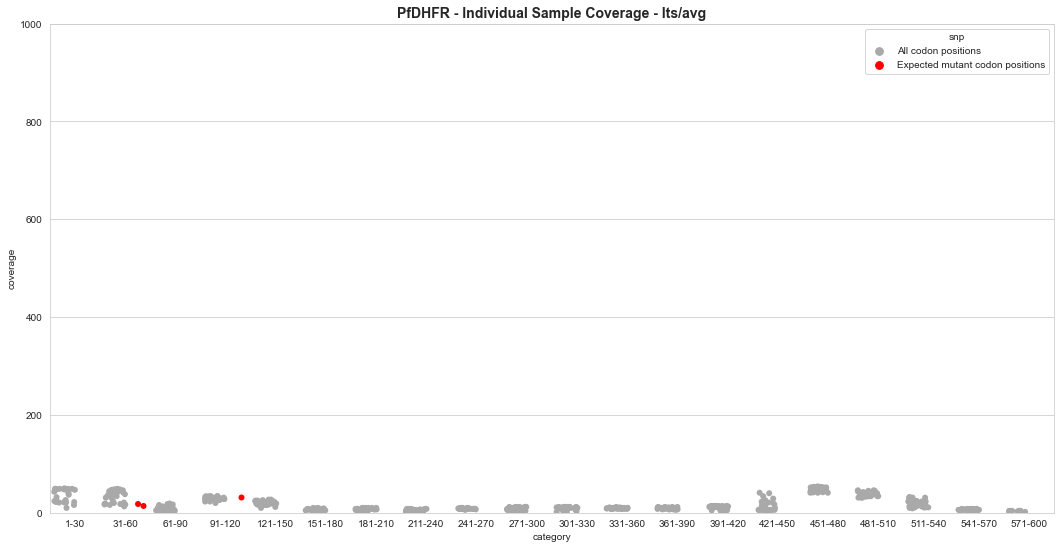

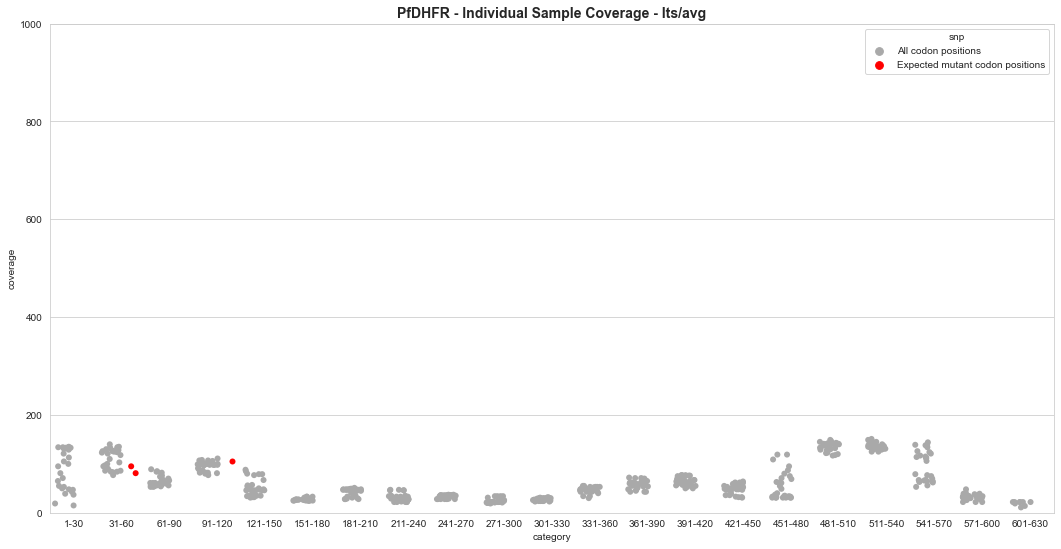

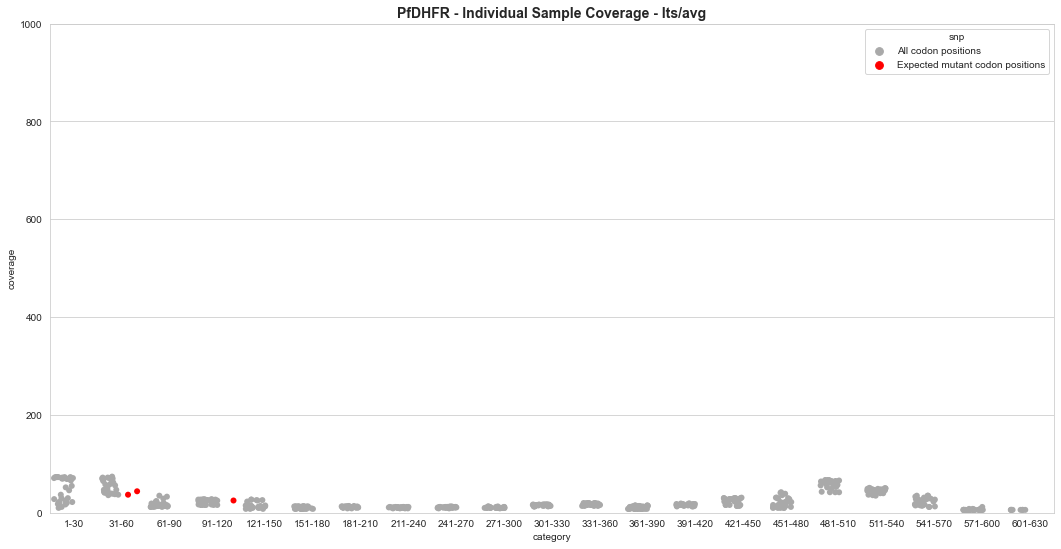

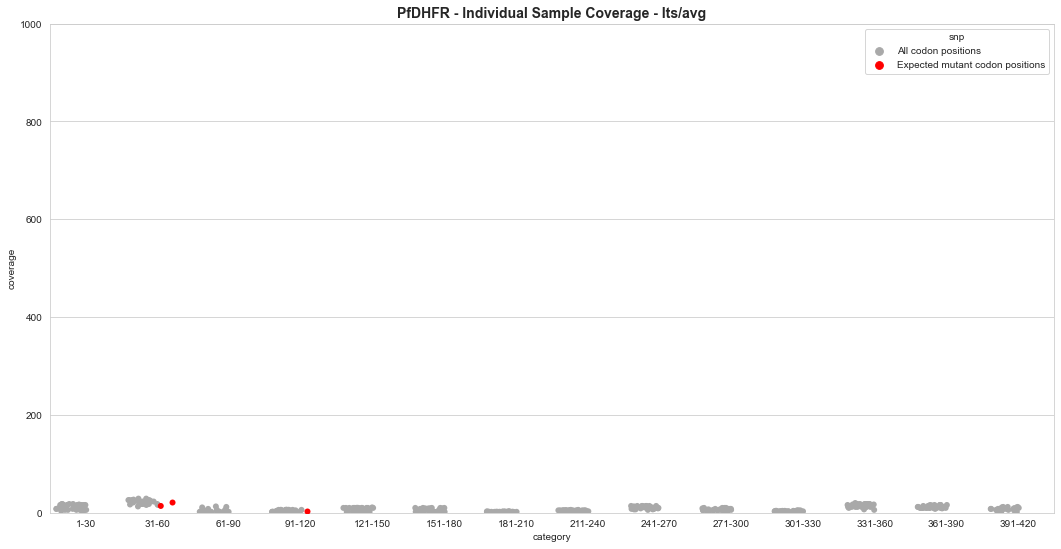

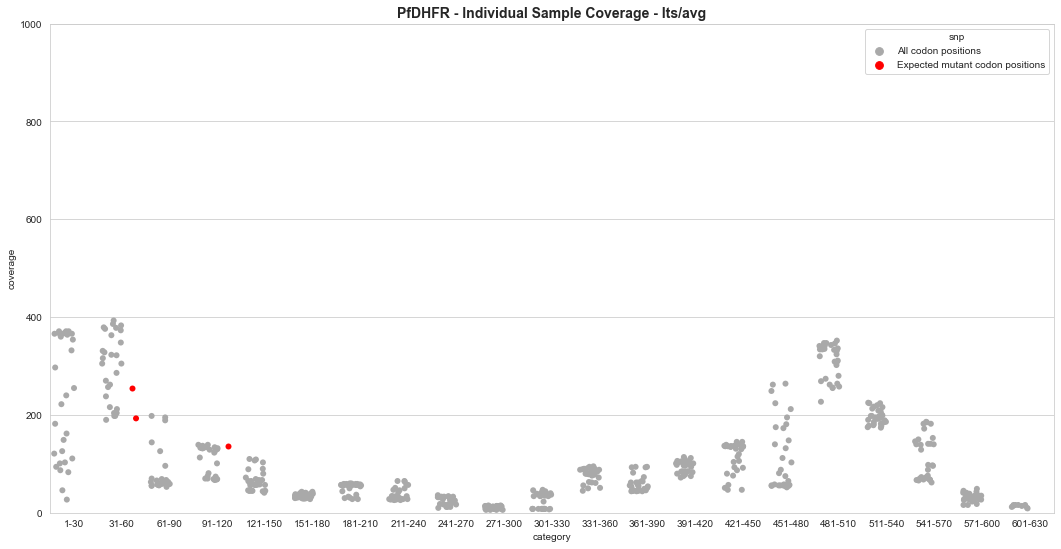

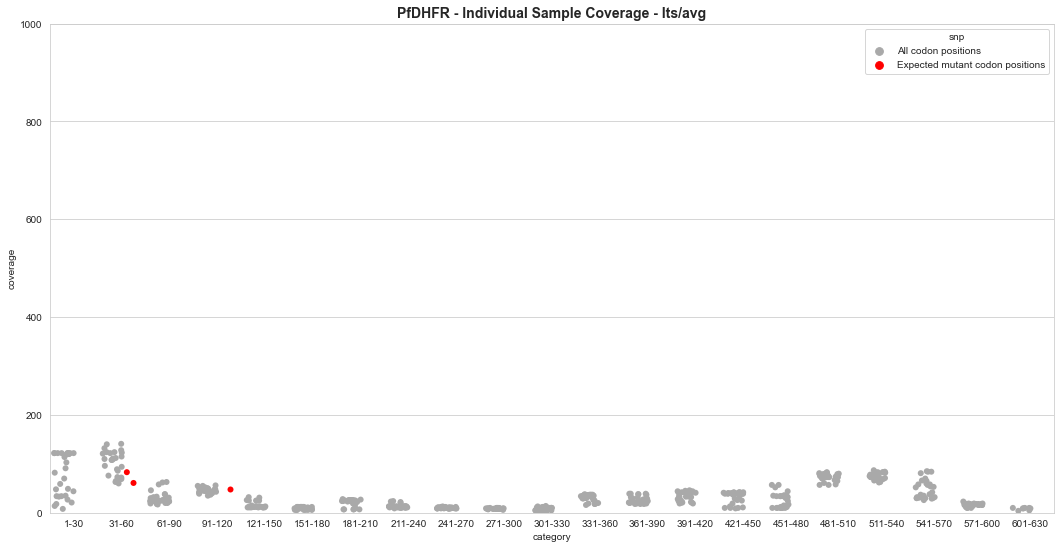

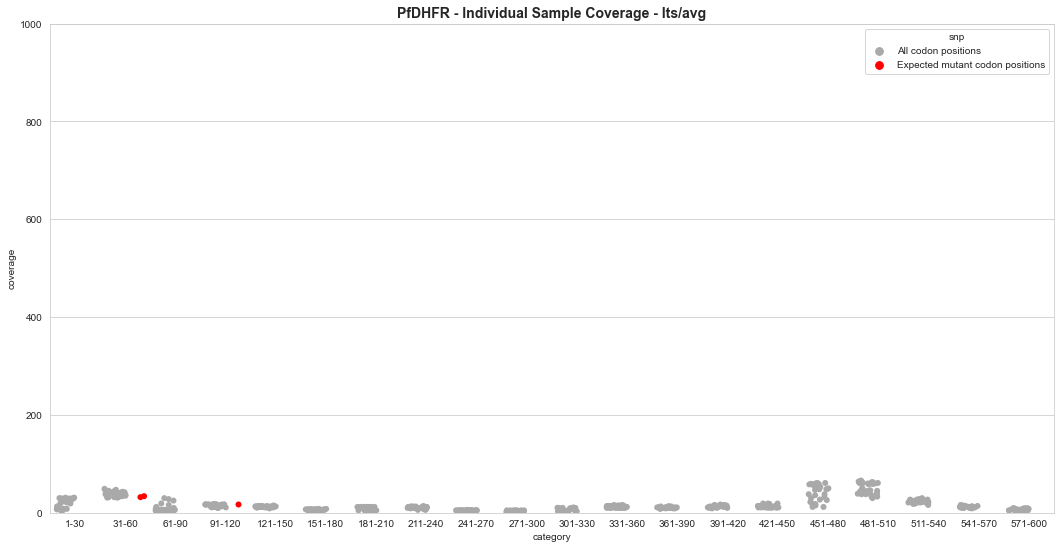

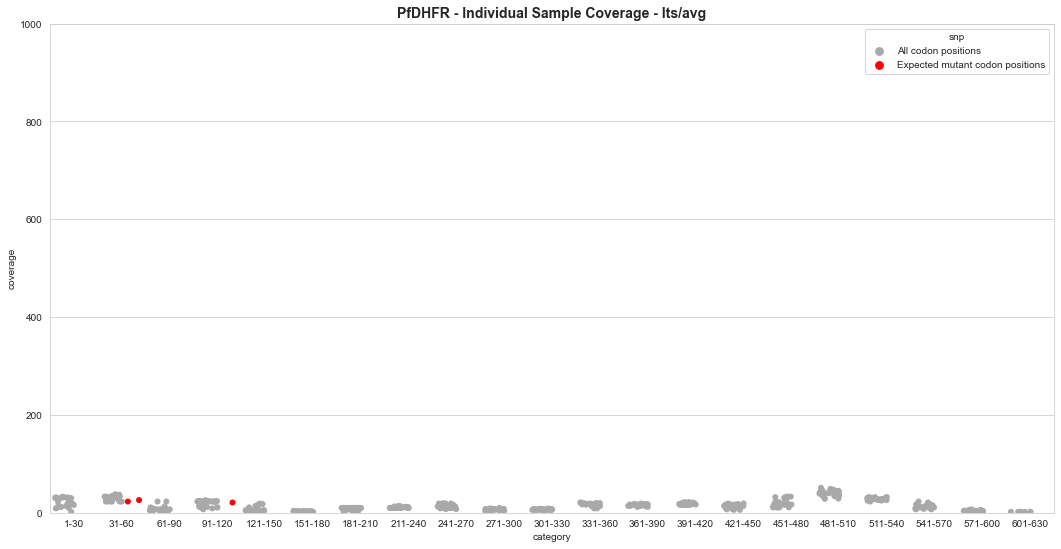

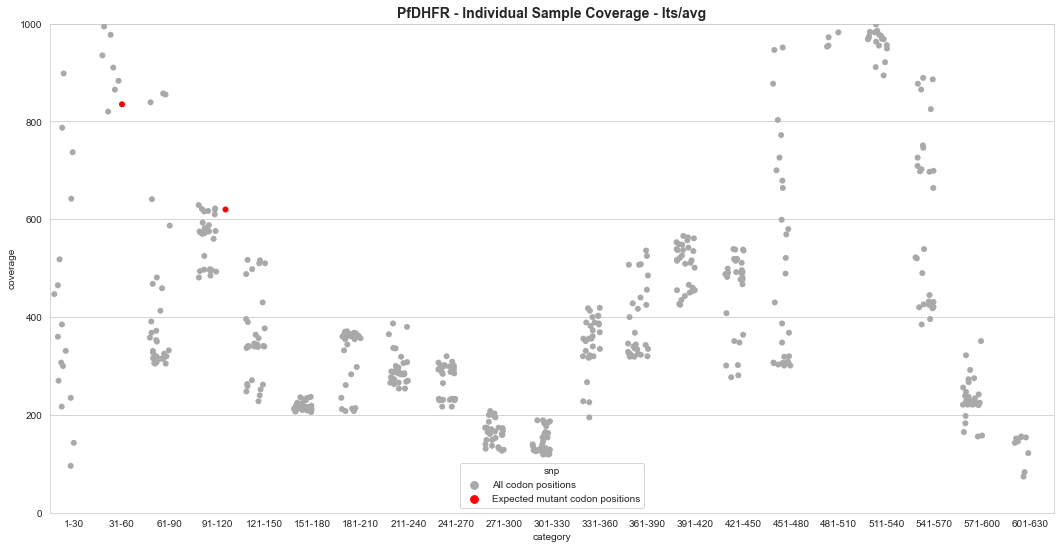

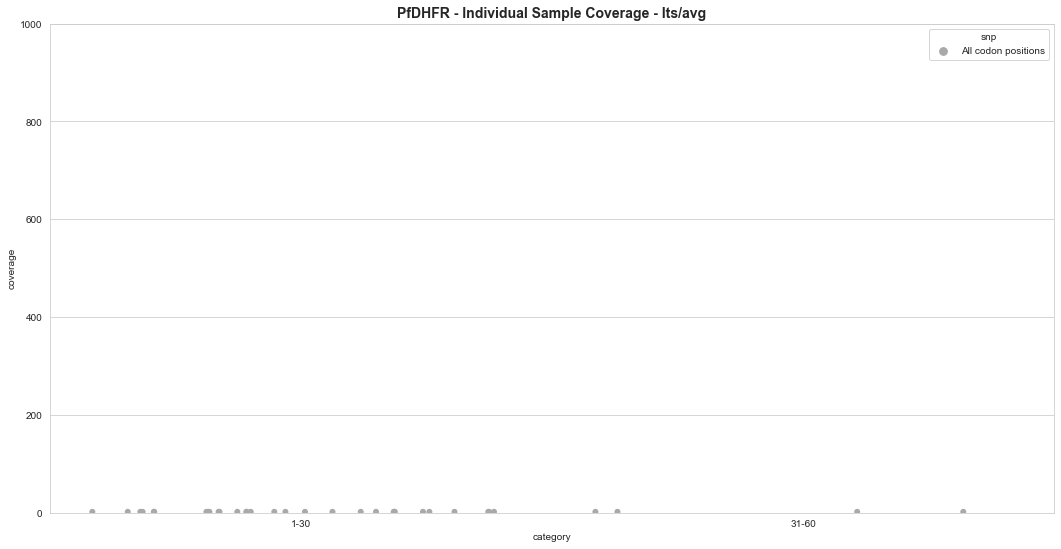

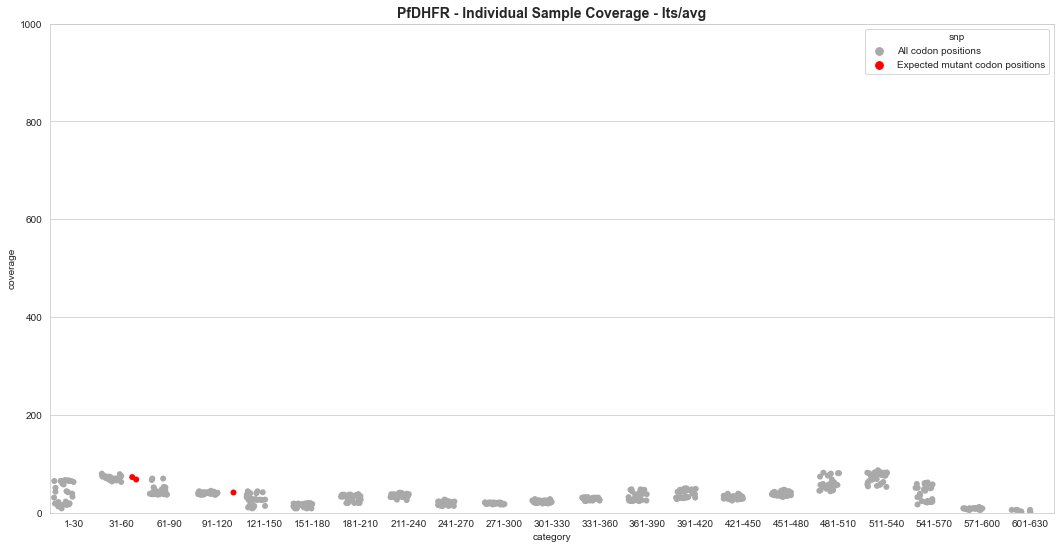

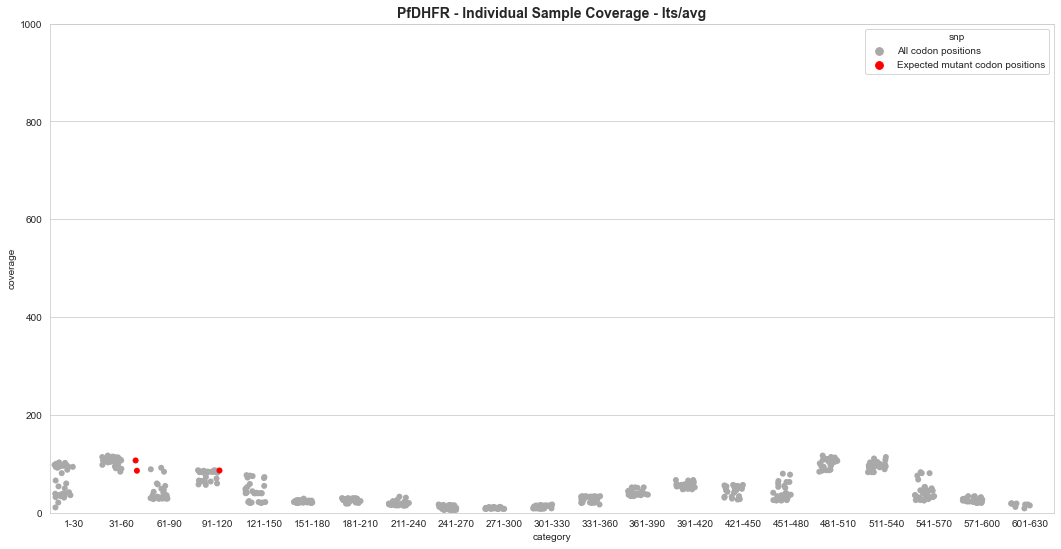

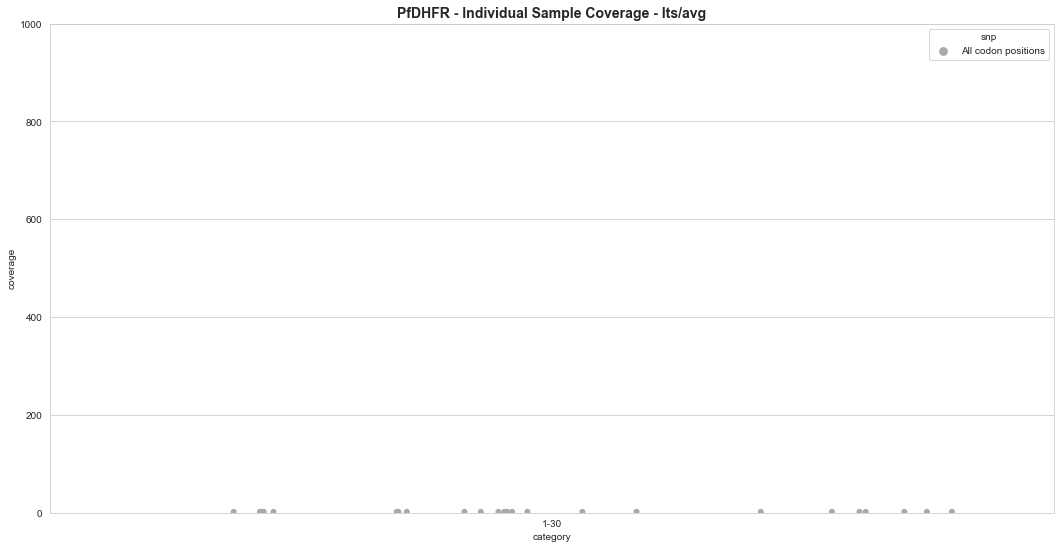

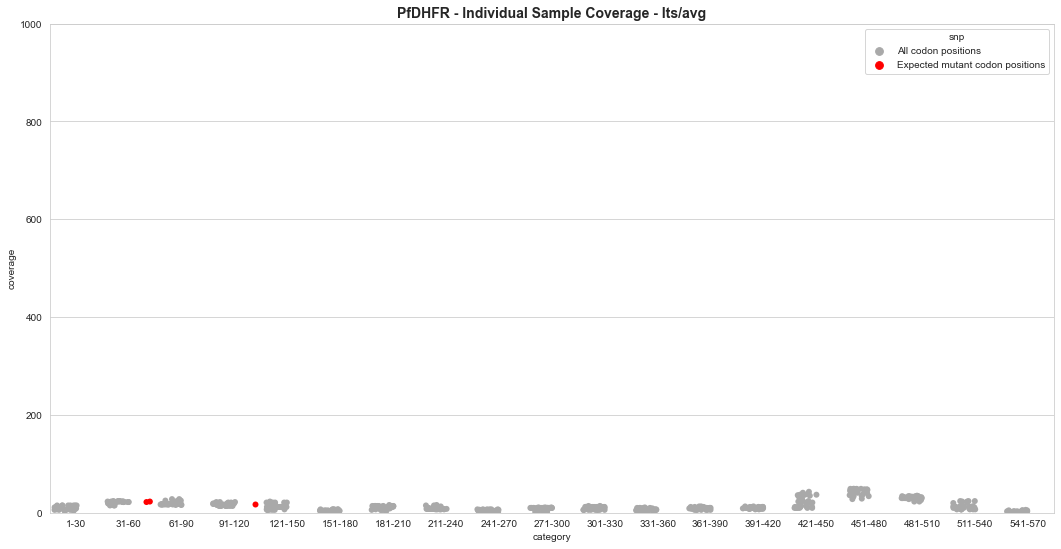

In [2]:
import os
import subprocess
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

def dhfr_catplot_individual(inputfile, outputfile):
    sample_num = filepath[73:80].split("P")[0]
    # print(sample_num)

    df1 = pd.read_csv(filepath, sep="\t")
    df1

    data = {'position':[], 'coverage':[], 'category':[]} #for new df

    ### For position column

    pos = list(df1.Codon_pos)
    for i in range(len(pos)):
        data['position'].append(pos[i])

    ### For coverage column

    cov = list(df1.Codon_coverage)
    for i in range(len(cov)):
        data['coverage'].append(cov[i])


    ### For category column

    start = 1
    end = 30

    for i in range(len(pos)):
        if pos[i] >= start and pos[i] <= end:
            data['category'].append(str(start)+"-"+str(end))
        if pos[i] == end:
            start = end+1
            end = end+30

    # print(len(data['position']))
    # print(len(data['coverage']))
    # print(len(data['category']))

    data_df = pd.DataFrame(data)

    data_df

    pos_list = []
    snp_list = ['N51I', 'C59R', 'S108N']
    for i in range(len(snp_list)):
        test_string = snp_list[i]
        snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
        pos_list.append(snp_position)


    x = (list(data_df.position))
    snp_col = []
    for i in range(len(x)):
        if x[i] not in pos_list: #if a codon position is not in snp position list then label as wild type, else mutant
            snp_col.append("All codon positions")
        else:
            snp_col.append("Expected mutant codon positions")


    data_df['snp'] = snp_col
    data_df


    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 9))
    my_pal = {"All codon positions":"#A9A9A9", "Expected mutant codon positions":"#FF0000"}

    g= sns.stripplot(x="category", y="coverage", data=data_df, hue = "snp", palette = my_pal, jitter = .42, size = 6, dodge=True)
    title = 'PfDHFR - Individual Sample Coverage - '+sample_num
    ax.set_title(title, fontweight ='bold', fontsize = 14)
    ax.set_ylim(0,1000)
    fig.savefig(outputfile, bbox_inches='tight')

    
############### Change the pool number below #################
for i in range(1,11):
    pool_id = "pool"+str(i)+"/"
    subprocess.call(['mkdir', '/Users/mansi/Desktop/Haiti/SNP_highlight/PfDHFR/'+pool_id])
    img_dir = r'/Users/mansi/Desktop/Haiti/SNP_highlight/PfDHFR/'+pool_id
    directory = r'/Users/mansi/Desktop/Haiti/Individual/Codon_coverage/PfDHFR/Coverage_results/avg_cov/'+pool_id #input directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        sample_num = filename[4:10].split("P")[0]
        img_filepath = img_dir+"PfDHFR-"+str(sample_num)+"-SNP-highlight.png"
        dhfr_catplot_individual(filepath, img_filepath)

# For Pooled samples - PfDHFR

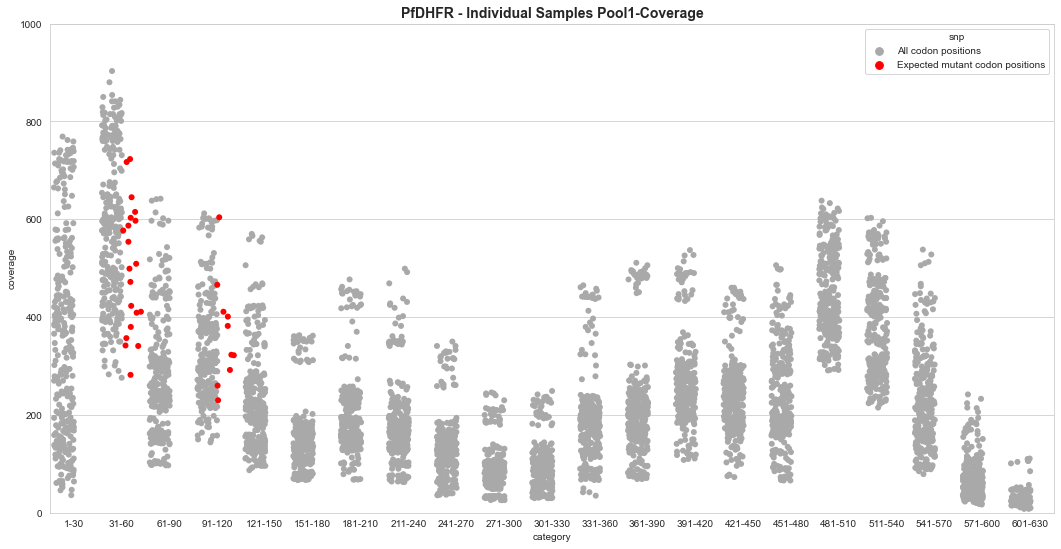

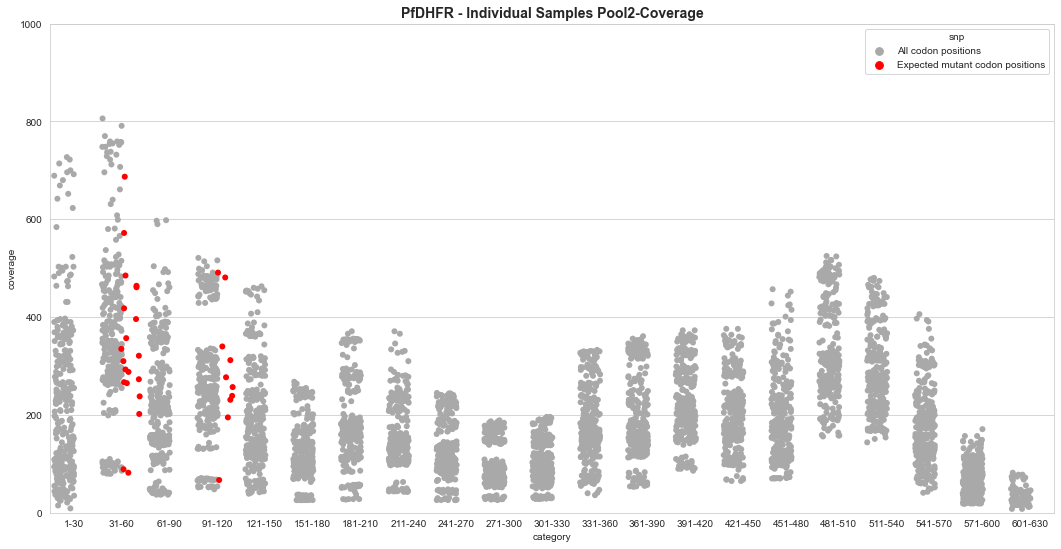

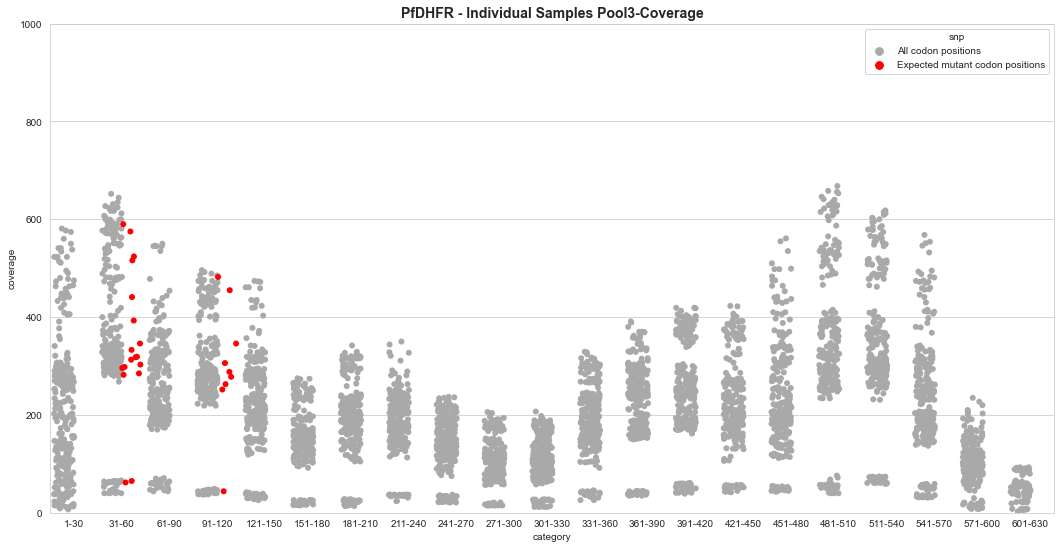

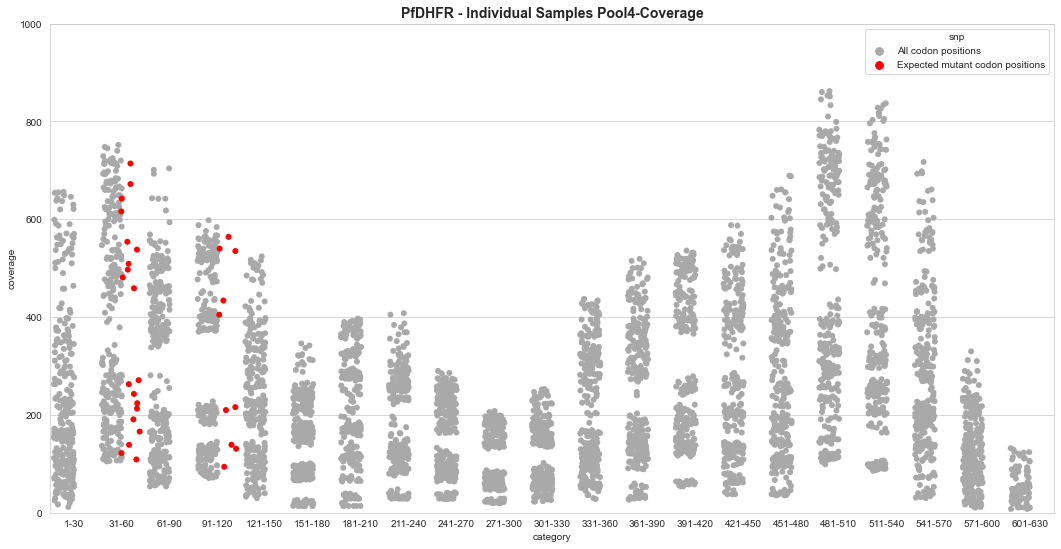

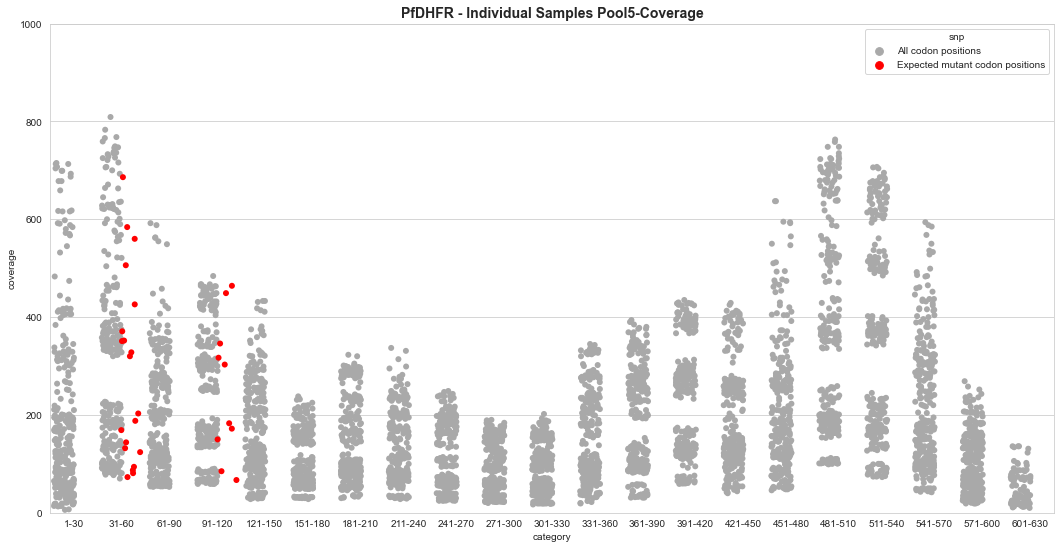

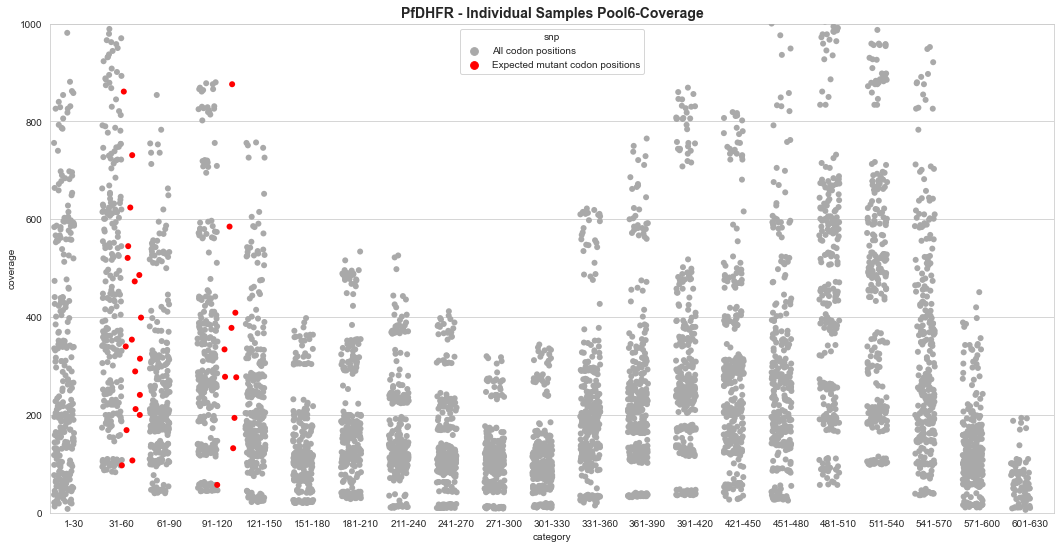

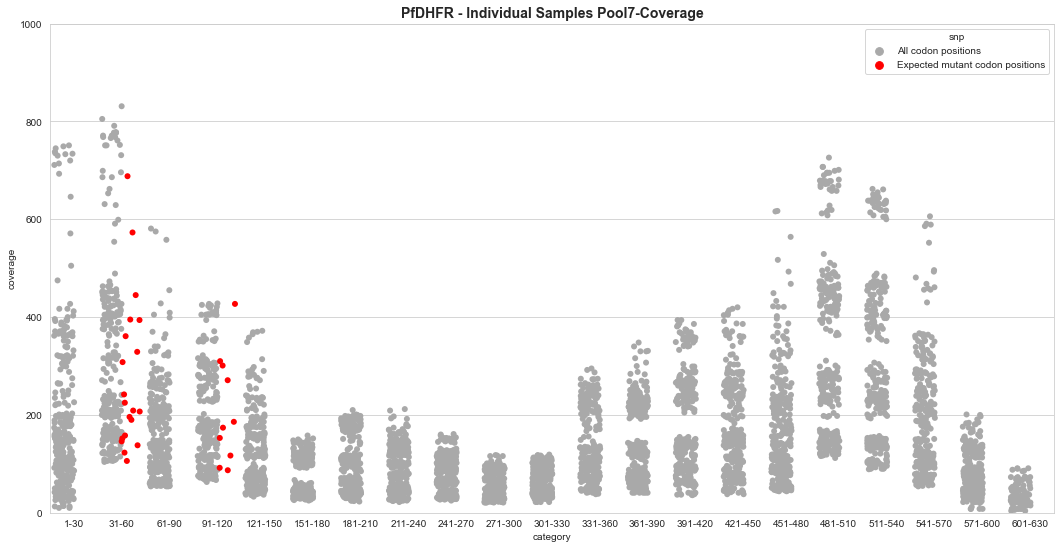

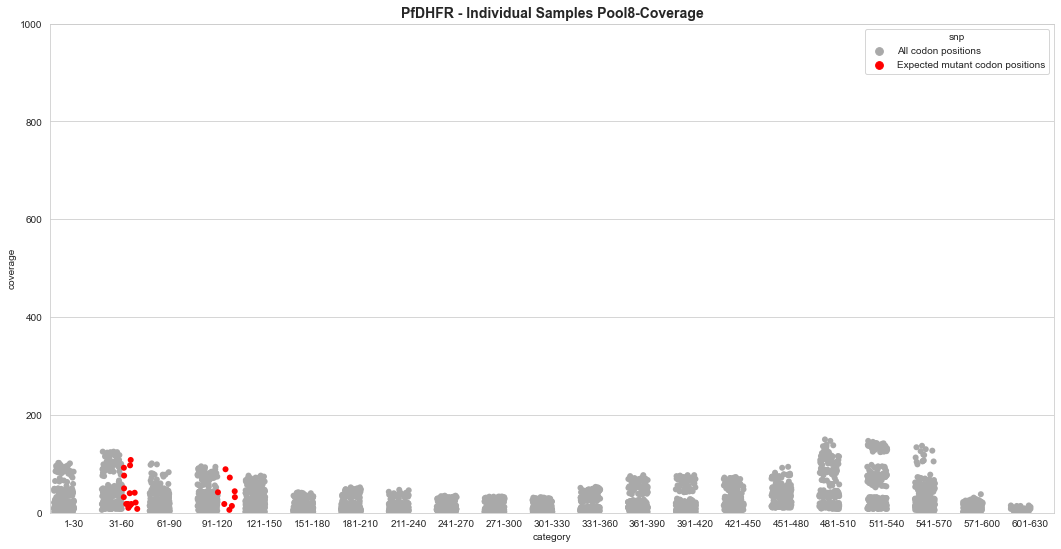

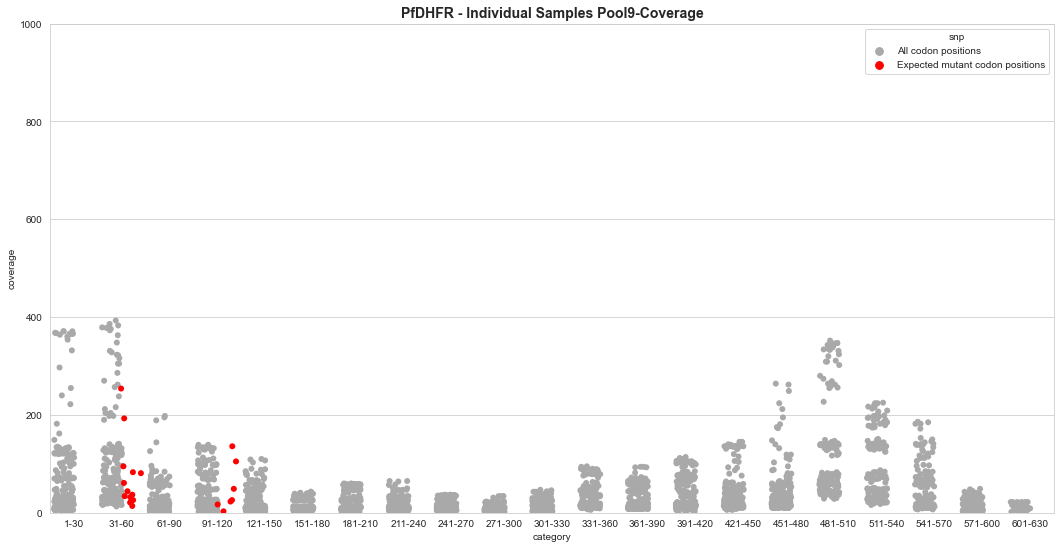

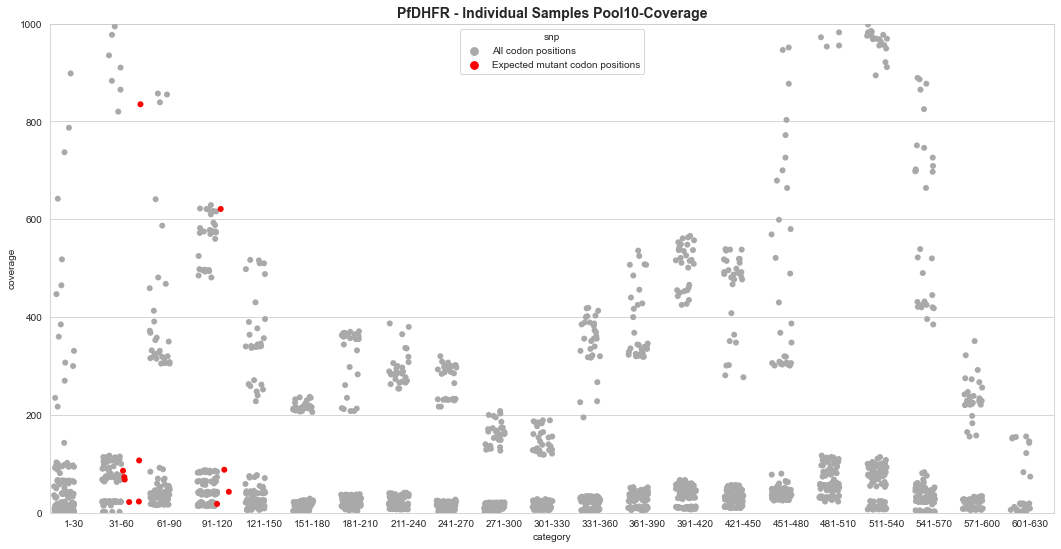

In [4]:
# with y limit = 1000

import os
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

for i in range(1,11):
    pool_id = "Pool"+str(i)+"/"
    data = {'position':[], 'coverage':[], 'category':[], 'sample':[]} #for new df
    directory = r'/Users/mansi/Desktop/Haiti/Individual/Codon_coverage/PfDHFR/Coverage_results/avg_cov/'+pool_id #input directory
    for filename in os.listdir(directory):
        if filename != ".DS_Store":
            filepath = os.path.join(directory, filename)
            sample_num = filepath[73:80].split("P")[0]
            # print(sample_num)

            df1 = pd.read_csv(filepath, sep="\t")
            df1


            ### For position column

            pos = list(df1.Codon_pos)
            for i in range(len(pos)):
                data['position'].append(pos[i])
                data['sample'].append(sample_num)

            ### For coverage column

            cov = list(df1.Codon_coverage)
            for i in range(len(cov)):
                data['coverage'].append(cov[i])


            ### For category column

            start = 1
            end = 30

            for i in range(len(pos)):
                if pos[i] >= start and pos[i] <= end:
                    data['category'].append(str(start)+"-"+str(end))
                if pos[i] == end:
                    start = end+1
                    end = end+30

            # print(len(data['position']))
            # print(len(data['coverage']))
            # print(len(data['category']))

    data_df = pd.DataFrame(data)

#     data_df

    pos_list = []
    snp_list = ['N51I', 'C59R', 'S108N']
    for i in range(len(snp_list)):
        test_string = snp_list[i]
        snp_position = int(''.join(filter(lambda i: i.isdigit(), test_string)))
        pos_list.append(snp_position)


    x = (list(data_df.position))
    snp_col = []
    for i in range(len(x)):
        if x[i] not in pos_list: #if a codon position is not in snp position list then label as wild type, else mutant
            snp_col.append("All codon positions")
        else:
            snp_col.append("Expected mutant codon positions")


    data_df['snp'] = snp_col

#     outputdir = r'/Users/mansi/Desktop/haiti-ind/SNP_color/DHFR/'+pool_id
    outputfile = '/Users/mansi/Desktop/Haiti/SNP_Highlight/PfDHFR/'+pool_id+"PfDHFR-"+str(pool_id.split("/")[0])+"-SNP-highlight.png"

    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 9))
    my_pal = {"All codon positions":"#A9A9A9", "Expected mutant codon positions":"#FF0000"}

    g= sns.stripplot(x="category", y="coverage", data=data_df, hue = "snp", palette = my_pal, jitter = .42, size = 6, dodge=True)
    title = 'PfDHFR - Individual Samples '+str(pool_id.split("/")[0])+'-Coverage'
    ax.set_title(title, fontweight ='bold', fontsize = 14)
    ax.set_ylim(0,1000)
    fig.savefig(outputfile, bbox_inches='tight')


# ############### Change the pool number below #################
# for i in range(1,11):
#     pool_id = "Pool"+str(i)+"/"
#     img_dir = r'/Users/mansi/Desktop/haiti-ind/SNP_color/DHFR/'+pool_id
#     directory = r'/Users/mansi/Desktop/haiti-ind/PfDHFR/Coverage_results/avg_cov/'+pool_id #input directory
#     for filename in os.listdir(directory):
#         filepath = os.path.join(directory, filename)
#         sample_num = filename[4:10].split("P")[0]
#         img_filepath = img_dir+"DHFR-"+str(sample_num)+"-SNP-highlight.png"
#         data = {'position':[], 'coverage':[], 'category':[], 'sample':[]} #for new df
#         dhfr_catplot_individual(filepath, img_filepath)